<h1>THE CODE THAT PRODUCED THE RESULTS USED IN THE THESIS IS LOCATED FURTHER BELOW THIS EXPERIMENTATION AND A MESSAGE SIMILAR TO THIS ONE PROCEEDS IT!</h1>

In [1]:
cd Literatúra pre deti

c:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Literatúra pre deti


C:\Users\adams\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import textstat
from collections import Counter
import os

compiled_stats_df = pd.DataFrame()

In [ ]:
def compute_text_statistics(file_path):

    global compiled_stats_df

    book_name = os.path.basename(file_path).split('.')[0]

    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()
    
    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    num_chars = len(text)
    num_words = len(words)
    num_sentences = len(sentences)
    avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
    word_lengths = [len(word) for word in words]
    avg_word_length = np.mean(word_lengths) if word_lengths else 0
    lemma_lengths = [len(word.lower()) for word in words]
    avg_lemma_length = np.mean(lemma_lengths) if lemma_lengths else 0

    total_syllables = sum(textstat.syllable_count(word) for word in words)
    avg_syllables_per_word = total_syllables / num_words if num_words > 0 else 0

    text_stats = {
        "Book Name": book_name,
        "Sentence Length (Avg)": avg_sentence_length,
        "Total Words": num_words,
        "Word Length (Avg)": avg_word_length,
        "Lemma Length (Avg)": avg_lemma_length,
        "Total Sentences": num_sentences,
        "Initial Text Length (Chars)": num_chars,
        "Unique Lemmas": len(set(words)),
        "Avg Syllables Per Word": avg_syllables_per_word
    }

    df_stats = pd.DataFrame([text_stats])

    compiled_stats_df = pd.concat([compiled_stats_df, df_stats], ignore_index=True)

    return compiled_stats_df


In [ ]:
file_path = "The_Aesop_for_Children.txt"
compute_text_statistics(file_path)
print(compiled_stats_df)

                Book Name  Sentence Length (Avg)  Total Words  \
0  The_Aesop_for_Children              19.657526        30823   

   Word Length (Avg)  Lemma Length (Avg)  Total Sentences  \
0           3.649969            3.649969             1568   

   Initial Text Length (Chars)  Unique Lemmas  Avg Syllables Per Word  
0                       139862           3812                1.055283  


In [ ]:
file_path = "Pinocchio_The_Tale_of_a_Puppet_Carlo_Collodi.txt"
compute_text_statistics(file_path)
print(compiled_stats_df)

                                      Book Name  Sentence Length (Avg)  \
0                        The_Aesop_for_Children              19.657526   
1  Pinocchio_The_Tale_of_a_Puppet_Carlo_Collodi              18.025804   

   Total Words  Word Length (Avg)  Lemma Length (Avg)  Total Sentences  \
0        30823           3.649969            3.649969             1568   
1        50995           3.607491            3.607491             2829   

   Initial Text Length (Chars)  Unique Lemmas  Avg Syllables Per Word  
0                       139862           3812                1.055283  
1                       225330           4372                1.039004  


In [ ]:
file_path = "Grimms_Fairy_Tales.txt"
compute_text_statistics(file_path)
print(compiled_stats_df)

                                      Book Name  Sentence Length (Avg)  \
0                        The_Aesop_for_Children              19.657526   
1  Pinocchio_The_Tale_of_a_Puppet_Carlo_Collodi              18.025804   
2                            Grimms_Fairy_Tales              28.738842   

   Total Words  Word Length (Avg)  Lemma Length (Avg)  Total Sentences  \
0        30823           3.649969            3.649969             1568   
1        50995           3.607491            3.607491             2829   
2       108173           3.491407            3.491407             3764   

   Initial Text Length (Chars)  Unique Lemmas  Avg Syllables Per Word  
0                       139862           3812                1.055283  
1                       225330           4372                1.039004  
2                       472077           5702                0.993057  


In [7]:
compiled_stats_df

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Lemma Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,Avg Syllables Per Word
0,The_Aesop_for_Children,19.657526,30823,3.649969,3.649969,1568,139862,3812,1.055283
1,Pinocchio_The_Tale_of_a_Puppet_Carlo_Collodi,18.025804,50995,3.607491,3.607491,2829,225330,4372,1.039004
2,Grimms_Fairy_Tales,28.738842,108173,3.491407,3.491407,3764,472077,5702,0.993057


In [ ]:
import numpy as np
import pandas as pd
import nltk
import textstat
import os
import random
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download("punkt")

def count_polysyllabic_words(words):
    """Counts words with 3 or more syllables, filtering out non-alphabetic items."""
    return sum(1 for word in words if word.isalpha() and textstat.syllable_count(word) >= 3)

def compute_forcast_score(words, num_samples=5):
    """
    Computes the FORCAST readability score by sampling multiple 150-word sections
    and averaging the results.
    """
    if len(words) < 150:
        return None
    
    sample_scores = []
    for _ in range(num_samples):
        sample = random.sample(words, 150)
        polysyllabic_count = count_polysyllabic_words(sample)
        forcast_score = 20 - (polysyllabic_count / 10)
        sample_scores.append(forcast_score)

    return np.mean(sample_scores)

def compute_text_statistics(file_path):
    """
    Reads a UTF-8 text file and computes various text statistics, including:
    - Sentence and word metrics
    - Readability scores (Flesch, SMOG, Dale-Chall, Gunning Fog, Linsear Write, FORCAST)
    - Average syllables per word
    
    Returns:
    A Pandas DataFrame with computed statistics.
    """

    book_name = os.path.basename(file_path).split('.')[0]

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]

        num_chars = len(text)
        num_words = len(words)
        num_sentences = len(sentences)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        avg_lemma_length = np.mean([len(word.lower()) for word in words]) if words else 0

        total_syllables = sum(textstat.syllable_count(word) for word in words)
        avg_syllables_per_word = total_syllables / num_words if num_words > 0 else 0

        forcast_score = compute_forcast_score(words)

        readability_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
            "SMOG Index": textstat.smog_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Gunning Fog Index": textstat.gunning_fog(text),
            "Linsear Write Formula": textstat.linsear_write_formula(text),
            "FORCAST Readability Score": forcast_score,
        }

        text_stats = {
            "Book Name": book_name,
            "Sentence Length (Avg)": avg_sentence_length,
            "Total Words": num_words,
            "Word Length (Avg)": avg_word_length,
            "Lemma Length (Avg)": avg_lemma_length,
            "Total Sentences": num_sentences,
            "Initial Text Length (Chars)": num_chars,
            "Unique Lemmas": len(set(words)),
            "Avg Syllables Per Word": avg_syllables_per_word,
        }

        text_stats.update(readability_scores)

        df_stats = pd.DataFrame([text_stats])

        return df_stats

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
file_path = "The_Aesop_for_Children.txt"
stats_df = compute_text_statistics(file_path)

stats_df

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Lemma Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,Avg Syllables Per Word,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,The_Aesop_for_Children,16.689413,26169,4.000191,4.000191,1568,139862,3143,1.21449,89.28,4.7,7.5,5.61,6.3,6.89,6.142857,19.6


In [ ]:
import numpy as np
import pandas as pd
import nltk
import textstat
import os
import random
from nltk.tokenize import sent_tokenize, word_tokenize

def count_polysyllabic_words(words):
    return sum(1 for word in words if word.isalpha() and textstat.syllable_count(word) >= 3)

def compute_forcast_score(words, num_samples=5):
    if len(words) < 150:
        return None
    
    sample_scores = []
    for _ in range(num_samples):
        sample = random.sample(words, 150)
        polysyllabic_count = count_polysyllabic_words(sample)
        forcast_score = 20 - (polysyllabic_count / 10)
        sample_scores.append(forcast_score)

    return np.mean(sample_scores)

def compute_text_statistics(file_path):
    book_name = os.path.basename(file_path).split('.')[0]

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]

        num_chars = len(text)
        num_words = len(words)
        num_sentences = len(sentences)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        avg_lemma_length = np.mean([len(word.lower()) for word in words]) if words else 0

        total_syllables = sum(textstat.syllable_count(word) for word in words)
        avg_syllables_per_word = total_syllables / num_words if num_words > 0 else 0

        forcast_score = compute_forcast_score(words)

        readability_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
            "SMOG Index": textstat.smog_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Gunning Fog Index": textstat.gunning_fog(text),
            "Linsear Write Formula": textstat.linsear_write_formula(text),
            "FORCAST Readability Score": forcast_score,
        }

        text_stats = {
            "Book Name": book_name,
            "Sentence Length (Avg)": avg_sentence_length,
            "Total Words": num_words,
            "Word Length (Avg)": avg_word_length,
            "Lemma Length (Avg)": avg_lemma_length,
            "Total Sentences": num_sentences,
            "Initial Text Length (Chars)": num_chars,
            "Unique Lemmas": len(set(words)),
            "Avg Syllables Per Word": avg_syllables_per_word,
        }

        text_stats.update(readability_scores)

        return text_stats

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_multiple_files(directory_path):
    all_results = []
    
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(directory_path, file_name)
            result = compute_text_statistics(file_path)
            if result:
                all_results.append(result)

    df_results = pd.DataFrame(all_results)
    return df_results



In [ ]:
import numpy as np
import pandas as pd
import nltk
import textstat
import os
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

nltk.download("averaged_perceptron_tagger")

def count_polysyllabic_words(words):
    return sum(1 for word in words if word.isalpha() and textstat.syllable_count(word) >= 3)

def compute_forcast_score(words, num_samples=5):
    if len(words) < 150:
        return None
    
    sample_scores = []
    for _ in range(num_samples):
        sample = random.sample(words, 150)
        polysyllabic_count = count_polysyllabic_words(sample)
        forcast_score = 20 - (polysyllabic_count / 10)
        sample_scores.append(forcast_score)

    return np.mean(sample_scores)

def compute_golub_sds(sentences):
    total_clauses = 0
    total_sentences = len(sentences)

    for sentence in sentences:
        words = word_tokenize(sentence)
        pos_tags = pos_tag(words)
        clause_count = sum(1 for _, tag in pos_tags if tag.startswith("VB"))
        total_clauses += clause_count

    return total_clauses / total_sentences if total_sentences > 0 else None

def compute_ttr(words):
    unique_words = set(words)
    return len(unique_words) / len(words) if words else None

def compute_sentence_variability(sentences):
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    return np.std(sentence_lengths) if sentence_lengths else None

def compute_polysyllabic_word_percentage(words):
    total_words = len(words)
    poly_count = count_polysyllabic_words(words)
    return (poly_count / total_words) * 100 if total_words > 0 else None

def compute_passive_voice_ratio(words):
    pos_tags = pos_tag(words)
    num_auxiliary_verbs = sum(1 for _, tag in pos_tags if tag in ['MD', 'VBZ', 'VBP'])
    num_verbs = sum(1 for _, tag in pos_tags if tag.startswith('VB'))
    return num_auxiliary_verbs / num_verbs if num_verbs > 0 else None

def compute_noun_to_verb_ratio(words):
    pos_tags = pos_tag(words)
    num_nouns = sum(1 for _, tag in pos_tags if tag.startswith('NN'))
    num_verbs = sum(1 for _, tag in pos_tags if tag.startswith('VB'))
    return num_nouns / num_verbs if num_verbs > 0 else None

def compute_text_statistics(file_path):
    book_name = os.path.basename(file_path).split('.')[0]

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]

        num_chars = len(text)
        num_words = len(words)
        num_sentences = len(sentences)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        avg_lemma_length = np.mean([len(word.lower()) for word in words]) if words else 0

        total_syllables = sum(textstat.syllable_count(word) for word in words)
        avg_syllables_per_word = total_syllables / num_words if num_words > 0 else 0

        forcast_score = compute_forcast_score(words)
        golub_sds = compute_golub_sds(sentences)
        ttr = compute_ttr(words)
        sentence_variability = compute_sentence_variability(sentences)
        polysyllabic_word_percentage = compute_polysyllabic_word_percentage(words)
        passive_voice_ratio = compute_passive_voice_ratio(words)
        noun_to_verb_ratio = compute_noun_to_verb_ratio(words)

        readability_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
            "SMOG Index": textstat.smog_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Gunning Fog Index": textstat.gunning_fog(text),
            "Linsear Write Formula": textstat.linsear_write_formula(text),
            "FORCAST Readability Score": forcast_score,
        }

        text_stats = {
            "Book Name": book_name,
            "Sentence Length (Avg)": avg_sentence_length,
            "Total Words": num_words,
            "Word Length (Avg)": avg_word_length,
            "Lemma Length (Avg)": avg_lemma_length,
            "Total Sentences": num_sentences,
            "Initial Text Length (Chars)": num_chars,
            "Unique Lemmas": len(set(words)),
            "Avg Syllables Per Word": avg_syllables_per_word,
            "Type-Token Ratio (TTR)": ttr,
            "Sentence Variability (Std Dev Sentence Length)": sentence_variability,
            "Polysyllabic Word %": polysyllabic_word_percentage,
            "Passive Voice Ratio": passive_voice_ratio,
            "Noun-to-Verb Ratio": noun_to_verb_ratio,
            "Golub's Syntactic Density Score": golub_sds,
        }

        text_stats.update(readability_scores)

        return text_stats

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_multiple_files(directory_path):
    all_results = []
    
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(directory_path, file_name)
            result = compute_text_statistics(file_path)
            if result:
                all_results.append(result)

    df_results = pd.DataFrame(all_results)
    return df_results


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Literatúra pre deti"
df = analyze_multiple_files(directory_path)
df


An error occurred: 
**********************************************************************
  Resource averaged_perceptron_tagger_eng not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load taggers/averaged_perceptron_tagger_eng/

  Searched in:
    - 'C:\\Users\\adams/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\adams\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
***************************************************************

""


In [ ]:
import numpy as np
import pandas as pd
import nltk
import textstat
import os
import random
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download("punkt")

def count_polysyllabic_words(words):
    return sum(1 for word in words if word.isalpha() and textstat.syllable_count(word) >= 3)

def compute_forcast_score(words, num_samples=5):
    if len(words) < 150:
        return None
    
    sample_scores = []
    for _ in range(num_samples):
        sample = random.sample(words, 150)
        polysyllabic_count = count_polysyllabic_words(sample)
        forcast_score = 20 - (polysyllabic_count / 10)
        sample_scores.append(forcast_score)

    return np.mean(sample_scores)

def compute_golub_syntactic_density(text, sample_size=100, num_samples=5):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    
    if len(words) < sample_size:
        return None 

    sample_scores = []
    for _ in range(num_samples):
        sample = random.sample(words, sample_size)
        content_words = [word for word in sample if textstat.syllable_count(word) > 1]
        density_score = len(content_words) / len(sample) if sample else 0
        sample_scores.append(density_score)

    return np.mean(sample_scores)

def compute_text_statistics(file_path):

    book_name = os.path.basename(file_path).split('.')[0]

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]

        num_chars = len(text)
        num_words = len(words)
        num_sentences = len(sentences)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        avg_lemma_length = np.mean([len(word.lower()) for word in words]) if words else 0

        total_syllables = sum(textstat.syllable_count(word) for word in words)
        avg_syllables_per_word = total_syllables / num_words if num_words > 0 else 0

        forcast_score = compute_forcast_score(words)
        golub_syntactic_density = compute_golub_syntactic_density(text)

        readability_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
            "SMOG Index": textstat.smog_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Gunning Fog Index": textstat.gunning_fog(text),
            "Linsear Write Formula": textstat.linsear_write_formula(text),
            "FORCAST Readability Score": forcast_score,
            "Spache Readability Score": textstat.spache_readability(text),
            "Coleman-Liau Index": textstat.coleman_liau_index(text),
            "Golub's Syntactic Density Score": golub_syntactic_density
        }

        text_stats = {
            "Book Name": book_name,
            "Sentence Length (Avg)": avg_sentence_length,
            "Total Words": num_words,
            "Word Length (Avg)": avg_word_length,
            "Lemma Length (Avg)": avg_lemma_length,
            "Total Sentences": num_sentences,
            "Initial Text Length (Chars)": num_chars,
            "Unique Lemmas": len(set(words)),
            "Avg Syllables Per Word": avg_syllables_per_word,
        }

        text_stats.update(readability_scores)

        return text_stats

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_multiple_files(directory_path):
    all_results = []
    
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(directory_path, file_name)
            result = compute_text_statistics(file_path)
            if result:
                all_results.append(result)

    df_results = pd.DataFrame(all_results)
    return df_results


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import numpy as np
import pandas as pd
import nltk
import textstat
import os
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger_eng')

def count_polysyllabic_words(words):
    return sum(1 for word in words if word.isalpha() and textstat.syllable_count(word) >= 3)

def compute_forcast_score(words, num_samples=5):
    if len(words) < 150:
        return None
    
    sample_scores = []
    for _ in range(num_samples):
        sample = random.sample(words, 150)
        polysyllabic_count = count_polysyllabic_words(sample)
        forcast_score = 20 - (polysyllabic_count / 10)
        sample_scores.append(forcast_score)

    return np.mean(sample_scores)

def compute_golub_sds(sentences):
    total_clauses = 0
    total_sentences = len(sentences)

    for sentence in sentences:
        words = word_tokenize(sentence)
        pos_tags = pos_tag(words)
        clause_count = sum(1 for _, tag in pos_tags if tag.startswith("VB"))
        total_clauses += clause_count

    return total_clauses / total_sentences if total_sentences > 0 else None

def compute_ttr(words):
    unique_words = set(words)
    return len(unique_words) / len(words) if words else None

def compute_sentence_variability(sentences):
    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
    return np.std(sentence_lengths) if sentence_lengths else None

def compute_polysyllabic_word_percentage(words):
    total_words = len(words)
    poly_count = count_polysyllabic_words(words)
    return (poly_count / total_words) * 100 if total_words > 0 else None

def compute_passive_voice_ratio(words):
    pos_tags = pos_tag(words)
    num_auxiliary_verbs = sum(1 for _, tag in pos_tags if tag in ['MD', 'VBZ', 'VBP'])
    num_verbs = sum(1 for _, tag in pos_tags if tag.startswith('VB'))
    return num_auxiliary_verbs / num_verbs if num_verbs > 0 else None

def compute_noun_to_verb_ratio(words):
    pos_tags = pos_tag(words)
    num_nouns = sum(1 for _, tag in pos_tags if tag.startswith('NN'))
    num_verbs = sum(1 for _, tag in pos_tags if tag.startswith('VB'))
    return num_nouns / num_verbs if num_verbs > 0 else None

def compute_text_statistics(file_path):

    book_name = os.path.basename(file_path).split('.')[0]

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]

        num_chars = len(text)
        num_words = len(words)
        num_sentences = len(sentences)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        avg_lemma_length = np.mean([len(word.lower()) for word in words]) if words else 0

        total_syllables = sum(textstat.syllable_count(word) for word in words)
        avg_syllables_per_word = total_syllables / num_words if num_words > 0 else 0

        forcast_score = compute_forcast_score(words)
        golub_sds = compute_golub_sds(sentences)
        ttr = compute_ttr(words)
        sentence_variability = compute_sentence_variability(sentences)
        polysyllabic_word_percentage = compute_polysyllabic_word_percentage(words)
        passive_voice_ratio = compute_passive_voice_ratio(words)
        noun_to_verb_ratio = compute_noun_to_verb_ratio(words)

        readability_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
            "SMOG Index": textstat.smog_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Gunning Fog Index": textstat.gunning_fog(text),
            "Linsear Write Formula": textstat.linsear_write_formula(text),
            "FORCAST Readability Score": forcast_score,
        }

        text_stats = {
            "Book Name": book_name,
            "Sentence Length (Avg)": avg_sentence_length,
            "Total Words": num_words,
            "Word Length (Avg)": avg_word_length,
            "Lemma Length (Avg)": avg_lemma_length,
            "Total Sentences": num_sentences,
            "Initial Text Length (Chars)": num_chars,
            "Unique Lemmas": len(set(words)),
            "Avg Syllables Per Word": avg_syllables_per_word,
            "Type-Token Ratio (TTR)": ttr,
            "Sentence Variability (Std Dev Sentence Length)": sentence_variability,
            "Polysyllabic Word %": polysyllabic_word_percentage,
            "Passive Voice Ratio": passive_voice_ratio,
            "Noun-to-Verb Ratio": noun_to_verb_ratio,
            "Golub's Syntactic Density Score": golub_sds,
        }

        text_stats.update(readability_scores)

        return text_stats

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_multiple_files(directory_path):
    all_results = []
    
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(directory_path, file_name)
            result = compute_text_statistics(file_path)
            if result:
                all_results.append(result)

    df_results = pd.DataFrame(all_results)
    return df_results

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Literatúra pre deti"
df = analyze_multiple_files(directory_path)

df.to_csv("Dukes_complex_readability_analysis_childrens_books.csv", index=False)

df

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Lemma Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,Avg Syllables Per Word,Type-Token Ratio (TTR),...,Noun-to-Verb Ratio,Golub's Syntactic Density Score,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Alices_Adventures_in_Wonderland_Lewis_Carroll,15.001567,9571,3.998746,3.998746,638,53020,1431,1.233622,0.149514,...,0.933367,3.128527,88.67,5.0,7.6,5.68,7.4,7.13,18.333333,19.46
1,Andersens_Fairy_Tales,22.857321,54949,4.074323,4.074323,2404,298858,4940,1.233089,0.089902,...,0.989060,4.360233,85.83,6.1,8.5,5.62,8.7,8.34,20.000000,19.48
2,A_Christmas_Carol_Charles_Dickens,14.537590,28232,4.188368,4.188368,1942,157788,4135,1.252550,0.146465,...,1.064365,2.770340,80.01,6.2,8.2,6.08,8.2,7.67,7.000000,19.26
3,Blacky_The_Crow_Thornton_W_Burgess,14.895778,22582,3.937827,3.937827,1516,117932,1757,1.167789,0.077805,...,0.801238,3.080475,90.09,4.4,6.5,1.35,5.7,6.26,7.666667,19.70
4,Black_Beauty_Anna_Sewell,23.342126,59289,3.800401,3.800401,2540,301974,3812,1.176609,0.064295,...,0.913731,4.650787,80.75,8.0,7.5,1.87,9.7,9.98,17.000000,19.64
5,Bowser_the_Hound_Thornton_W_Burgess,15.281116,21363,3.988672,3.988672,1398,112579,1868,1.208819,0.087441,...,0.842353,3.221745,89.89,4.5,6.7,1.46,5.8,6.39,5.375000,19.42
6,Daddy_Long_Legs_Jean_Webster,14.341797,36715,4.107912,4.107912,2560,216010,4685,1.302056,0.127605,...,1.048876,2.966016,81.93,5.5,8.7,5.81,6.9,6.91,11.600000,19.16
7,Grimms_Fairy_Tales,23.462274,88312,3.917350,3.917350,3764,472077,4337,1.181685,0.049110,...,0.844858,4.983528,87.55,5.4,7.1,1.39,7.2,7.22,18.333333,19.70
8,Heidi_Johanna_Spyri,13.421505,49928,4.148694,4.148694,3720,273906,3648,1.261757,0.073065,...,0.828672,2.906989,82.75,5.2,7.9,1.44,6.3,6.05,11.200000,19.42
9,Just_so_stories_Rudyard_Kipling,16.181658,27525,3.911390,3.911390,1701,157764,2608,1.190954,0.094750,...,0.997787,3.122281,86.54,5.8,8.0,5.62,8.6,7.75,12.750000,19.62


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Odborná literatúra"
df_academic = analyze_multiple_files(directory_path)

df_academic.to_csv("Dukes_complex_readability_analysis_academic_books.csv", index=False)

df_academic

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Lemma Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,Avg Syllables Per Word,Type-Token Ratio (TTR),...,Noun-to-Verb Ratio,Golub's Syntactic Density Score,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,A-B-C_of_Electricity_Wm_H_Meadowcroft,24.933931,22266,4.323947,4.323947,893,125908,1860,1.351567,0.083535,...,1.235188,4.235162,60.08,11.8,12.1,5.94,13.8,11.92,30.500000,18.72
1,Applied_Psychology_for_Nurses_Mary_F_Porter,21.053457,36233,4.581293,4.581293,1721,222044,4338,1.456959,0.119725,...,1.366333,3.434631,57.91,10.6,12.6,6.24,12.2,10.25,16.250000,18.04
2,Bronchoscopy_and_Esophagoscopy_Chevalier_Jackson,16.687514,74443,5.011526,5.011526,4461,479524,5909,1.580605,0.079376,...,1.695565,2.555929,52.09,10.7,13.2,5.72,12.7,8.94,22.333333,17.60
3,Cattle_and_Their_Diseases_Robert_Jennings,24.170595,90253,4.588667,4.588667,3734,538839,7450,1.436318,0.082546,...,1.462959,3.746652,54.05,12.1,13.0,6.06,14.3,11.24,14.750000,18.24
4,Chlorination_of_Water_Joseph_Race,15.675524,33624,5.063437,5.063437,2145,258042,3643,1.607661,0.108345,...,1.830093,2.554779,53.51,10.2,12.4,6.06,13.3,8.50,17.750000,17.50
5,Common_Diseases_of_Farm_Animals,15.067935,84727,4.762921,4.762921,5623,528041,5514,1.513095,0.065080,...,1.632291,2.371332,63.19,8.5,12.0,5.42,10.4,7.51,17.000000,17.72
6,Electric_Transmission_of_Water_Power_Alton_D_A...,26.919797,106064,4.610141,4.610141,3940,681192,3891,1.451605,0.036685,...,2.116563,3.489594,52.94,12.5,13.4,1.82,15.0,11.02,7.875000,18.44
7,Inventions_in_the_Century_William_Henry_Doolittle,32.205061,134907,4.719940,4.719940,4189,832378,10757,1.459094,0.079736,...,1.712773,5.030317,53.95,12.1,13.3,6.09,15.0,11.16,3.823529,18.60
8,Lectures_on_Evolution_Huxley,35.141115,20171,4.584007,4.584007,574,118206,2710,1.448466,0.134351,...,1.434619,5.404181,44.61,15.7,15.4,6.97,18.5,15.67,20.666667,17.82
9,Mariner_Mission_to_Venus_Jet_Propulsion_Labora...,23.358120,27329,5.114933,5.114933,1170,186756,3507,1.600571,0.128325,...,2.185907,3.350427,50.46,11.4,13.4,6.39,13.9,9.94,17.500000,17.68


: 

In [1]:
cd "c:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty"

c:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty


C:\Users\adams\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import numpy as np
import pandas as pd
import nltk
import textstat
import os
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

df_words = pd.read_csv("categorized_words.csv")

ABSTRACT_WORDS = set(df_words[df_words["Category"] == "Abstract"]["Word"].str.lower())
CONCRETE_WORDS = set(df_words[df_words["Category"] == "Concrete"]["Word"].str.lower())

PRONOUNS = {word.lower() for word in [
    "i", "me", "my", "mine", "myself", "we", "us", "our", "ours", "ourselves",
    "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
    "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",

    "thou", "thee", "thy", "thine", "ye", "your", "yours", "yourself", "yourselves",

    "ic", "me", "min", "mec", "mīn", "mē", "þu", "þe", "þīn", "þec", "þē",

    "wit", "unc", "uncer", "we", "us", "ūser", "ūre",

    "git", "inc", "incer", "ge", "eow", "eower",

    "he", "hine", "his", "him",
    "heo", "hie", "hi", "hire", "heo",
    "hit", "his", "him", 
    "hie", "hira", "heora", "heom"
]}


NOMINALIZATION_SUFFIXES = ["ment", "tion", "sion", "ance", "ence", "ity", "ness", "ism", "ship"]

def count_polysyllabic_words(words):
    return sum(1 for word in words if word.isalpha() and textstat.syllable_count(word) >= 3)

def compute_forcast_score(words, num_samples=5):
    if len(words) < 150:
        return None
    sample_scores = [20 - (count_polysyllabic_words(random.sample(words, 150)) / 10) for _ in range(num_samples)]
    return np.mean(sample_scores)

def count_nominalizations(words):
    return sum(1 for word in words if any(word.endswith(suffix) for suffix in NOMINALIZATION_SUFFIXES))

def compute_abstract_vs_concrete_ratio(words):
    num_abstract = sum(1 for word in words if word in ABSTRACT_WORDS)
    num_concrete = sum(1 for word in words if word in CONCRETE_WORDS)
    return num_abstract / num_concrete if num_concrete > 0 else 0

def compute_text_statistics(file_path):
    book_name = os.path.basename(file_path).split('.')[0]
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]

        num_chars = len(text)
        num_words = len(words)
        num_sentences = len(sentences)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        avg_syllables_per_word = sum(textstat.syllable_count(word) for word in words) / num_words if num_words > 0 else 0
        
        lexical_density = sum(1 for word in words if wordnet.synsets(word)) / num_words if num_words else 0
        pronoun_usage = sum(1 for word in words if word in PRONOUNS) / num_words * 100 if num_words else 0
        nominalization_rate = count_nominalizations(words) / num_words * 100 if num_words else 0
        hapax_legomena_ratio = sum(1 for word in set(words) if words.count(word) == 1) / num_words * 100 if num_words else 0
        abstract_vs_concrete_ratio = compute_abstract_vs_concrete_ratio(words)

        readability_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
            "SMOG Index": textstat.smog_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Gunning Fog Index": textstat.gunning_fog(text),
            "Linsear Write Formula": textstat.linsear_write_formula(text),
            "FORCAST Readability Score": compute_forcast_score(words),
        }

        text_stats = {
            "Book Name": book_name,
            "Sentence Length (Avg)": avg_sentence_length,
            "Total Words": num_words,
            "Word Length (Avg)": avg_word_length,
            "Total Sentences": num_sentences,
            "Initial Text Length (Chars)": num_chars,
            "Unique Lemmas": len(set(words)),
            "Avg Syllables Per Word": avg_syllables_per_word,
            "Lexical Density": lexical_density,
            "Pronoun Usage Rate (%)": pronoun_usage,
            "Nominalization Rate (%)": nominalization_rate,
            "Hapax Legomena Ratio (%)": hapax_legomena_ratio,
            "Abstract vs. Concrete Words Ratio": abstract_vs_concrete_ratio,
        }
        text_stats.update(readability_scores)
        return text_stats
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_multiple_files(directory_path, output_csv="text_analysis_results.csv"):
    all_results = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(directory_path, file_name)
            result = compute_text_statistics(file_path)
            if result:
                all_results.append(result)
    df_results = pd.DataFrame(all_results)
    df_results.to_csv(output_csv, index=False, encoding='utf-8')
    return df_results


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import numpy as np
import pandas as pd
import nltk
import textstat
import os
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

df_words = pd.read_csv("categorized_words.csv")

ABSTRACT_WORDS = set(df_words[df_words["Category"] == "Abstract"]["Word"].str.lower())
CONCRETE_WORDS = set(df_words[df_words["Category"] == "Concrete"]["Word"].str.lower())

PRONOUNS = {word.lower() for word in [
    "i", "me", "my", "mine", "myself", "we", "us", "our", "ours", "ourselves",
    "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
    "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",

    "thou", "thee", "thy", "thine", "ye", "your", "yours", "yourself", "yourselves",

    "ic", "me", "min", "mec", "mīn", "mē", "þu", "þe", "þīn", "þec", "þē",

    "wit", "unc", "uncer", "we", "us", "ūser", "ūre",

    "git", "inc", "incer", "ge", "eow", "eower",

    "he", "hine", "his", "him",
    "heo", "hie", "hi", "hire", "heo",
    "hit", "his", "him",
    "hie", "hira", "heora", "heom"
]}

NOMINALIZATION_SUFFIXES = ["ment", "tion", "sion", "ance", "ence", "ity", "ness", "ism", "ship"]

def count_polysyllabic_words(words):
    return sum(1 for word in words if word.isalpha() and textstat.syllable_count(word) >= 3)

def compute_forcast_score(words, num_samples=5):
    sample_scores = [20 - (count_polysyllabic_words(random.sample(words, 150)) / 10) for _ in range(num_samples)]
    return np.mean(sample_scores)

def count_nominalizations(words):
    return sum(1 for word in words if any(word.endswith(suffix) for suffix in NOMINALIZATION_SUFFIXES))

def compute_abstract_vs_concrete_ratio(words):
    num_abstract = sum(1 for word in words if word in ABSTRACT_WORDS)
    num_concrete = sum(1 for word in words if word in CONCRETE_WORDS)
    return num_abstract / num_concrete if num_concrete > 0 else 0

def compute_text_statistics(file_path):
    book_name = os.path.basename(file_path).split('.')[0]
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]

        num_chars = len(text)
        num_words = len(words)
        num_unique_words = len(set(words))
        unique_to_total_ratio = num_unique_words / num_words if num_words > 0 else 0
        num_sentences = len(sentences)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        avg_syllables_per_word = sum(textstat.syllable_count(word) for word in words) / num_words if num_words > 0 else 0
        
        lexical_density = sum(1 for word in words if wordnet.synsets(word)) / num_words if num_words else 0
        pronoun_usage = sum(1 for word in words if word in PRONOUNS) / num_words * 100 if num_words else 0
        nominalization_rate = count_nominalizations(words) / num_words * 100 if num_words else 0
        hapax_legomena_ratio = sum(1 for word in set(words) if words.count(word) == 1) / num_words * 100 if num_words else 0
        abstract_vs_concrete_ratio = compute_abstract_vs_concrete_ratio(words)

        readability_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
            "SMOG Index": textstat.smog_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Gunning Fog Index": textstat.gunning_fog(text),
            "Linsear Write Formula": textstat.linsear_write_formula(text),
            "FORCAST Readability Score": compute_forcast_score(words),
        }

        text_stats = {
            "Book Name": book_name,
            "Sentence Length (Avg)": avg_sentence_length,
            "Total Words": num_words,
            "Word Length (Avg)": avg_word_length,
            "Total Sentences": num_sentences,
            "Initial Text Length (Chars)": num_chars,
            "Unique Lemmas": len(set(words)),
            "TTR": unique_to_total_ratio,
            "Avg Syllables Per Word": avg_syllables_per_word,
            "Lexical Density": lexical_density,
            "Pronoun Usage Rate (%)": pronoun_usage,
            "Nominalization Rate (%)": nominalization_rate,
            "Hapax Legomena Ratio (%)": hapax_legomena_ratio,
            "Abstract vs. Concrete Words Ratio": abstract_vs_concrete_ratio,
        }
        text_stats.update(readability_scores)
        return text_stats
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_multiple_files(directory_path, output_csv="text_analysis_results.csv"):
    all_results = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(directory_path, file_name)
            result = compute_text_statistics(file_path)
            if result:
                all_results.append(result)
    df_results = pd.DataFrame(all_results)
    df_results.to_csv(output_csv, index=False, encoding='utf-8')
    return df_results


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Literatúra pre deti"
df = analyze_multiple_files(directory_path)

df.to_csv("Dukes_complex_readability_analysis_childrens_books.csv", index=False)

df

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Alices_Adventures_in_Wonderland_Lewis_Carroll,15.001567,9571,3.998746,638,53020,1431,0.149514,1.233622,0.694180,...,6.864486,1.588270,88.67,5.0,7.6,5.68,7.4,7.13,18.333333,19.58
1,Andersens_Fairy_Tales,22.857321,54949,4.074323,2404,298858,4940,0.089902,1.233089,0.700686,...,4.196619,1.724251,85.83,6.1,8.5,5.62,8.7,8.34,20.000000,19.58
2,A_Christmas_Carol_Charles_Dickens,14.537590,28232,4.188368,1942,157788,4135,0.146465,1.252550,0.718157,...,8.214083,1.783508,80.01,6.2,8.2,6.08,8.2,7.67,7.000000,19.30
3,Blacky_The_Crow_Thornton_W_Burgess,14.895778,22582,3.937827,1516,117932,1757,0.077805,1.167789,0.709725,...,2.900540,1.794174,90.09,4.4,6.5,1.35,5.7,6.26,7.666667,19.68
4,Black_Beauty_Anna_Sewell,23.342126,59289,3.800401,2540,301974,3812,0.064295,1.176609,0.724047,...,2.651419,1.709945,80.75,8.0,7.5,1.87,9.7,9.98,17.000000,19.76
5,Bowser_the_Hound_Thornton_W_Burgess,15.281116,21363,3.988672,1398,112579,1868,0.087441,1.208819,0.719375,...,3.332865,1.756883,89.89,4.5,6.7,1.46,5.8,6.39,5.375000,19.58
6,Daddy_Long_Legs_Jean_Webster,14.341797,36715,4.107912,2560,216010,4685,0.127605,1.302056,0.720605,...,6.798311,1.723491,81.93,5.5,8.7,5.81,6.9,6.91,11.600000,19.14
7,Grimms_Fairy_Tales,23.462274,88312,3.917350,3764,472077,4337,0.049110,1.181685,0.674948,...,1.773258,1.496836,87.55,5.4,7.1,1.39,7.2,7.22,18.333333,19.52
8,Heidi_Johanna_Spyri,13.421505,49928,4.148694,3720,273906,3648,0.073065,1.261757,0.674932,...,3.124499,1.548137,82.75,5.2,7.9,1.44,6.3,6.05,11.200000,19.28
9,Just_so_stories_Rudyard_Kipling,16.181658,27525,3.911390,1701,157764,2608,0.094750,1.190954,0.673097,...,4.319709,1.425413,86.54,5.8,8.0,5.62,8.6,7.75,12.750000,19.58


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Odborná literatúra"
df_academic = analyze_multiple_files(directory_path)

df_academic.to_csv("Dukes_complex_readability_analysis_academic_books.csv", index=False)

df_academic

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,A-B-C_of_Electricity_Wm_H_Meadowcroft,24.933931,22266,4.323947,893,125908,1860,0.083535,1.351567,0.693434,...,3.152789,2.094956,60.08,11.8,12.1,5.94,13.8,11.92,30.500000,18.92
1,Applied_Psychology_for_Nurses_Mary_F_Porter,21.053457,36233,4.581293,1721,222044,4338,0.119725,1.456959,0.703088,...,5.726824,3.118745,57.91,10.6,12.6,6.24,12.2,10.25,16.250000,18.12
2,Bronchoscopy_and_Esophagoscopy_Chevalier_Jackson,16.687514,74443,5.011526,4461,479524,5909,0.079376,1.580605,0.712129,...,2.987521,2.279710,52.09,10.7,13.2,5.72,12.7,8.94,22.333333,17.26
3,Cattle_and_Their_Diseases_Robert_Jennings,24.170595,90253,4.588667,3734,538839,7450,0.082546,1.436318,0.708231,...,3.468029,2.336661,54.05,12.1,13.0,6.06,14.3,11.24,14.750000,18.26
4,Chlorination_of_Water_Joseph_Race,15.675524,33624,5.063437,2145,258042,3643,0.108345,1.607661,0.705954,...,4.529503,2.432419,53.51,10.2,12.4,6.06,13.3,8.50,17.750000,17.60
5,Common_Diseases_of_Farm_Animals,15.067935,84727,4.762921,5623,528041,5514,0.065080,1.513095,0.709195,...,2.240136,1.902507,63.19,8.5,12.0,5.42,10.4,7.51,17.000000,18.08
6,Electric_Transmission_of_Water_Power_Alton_D_A...,26.919797,106064,4.610141,3940,681192,3891,0.036685,1.451605,0.710533,...,1.128564,2.005378,52.94,12.5,13.4,1.82,15.0,11.02,7.875000,18.38
7,Elementary_cryptanalysis_Helen_Fouché_Gaines,23.437276,124241,3.644095,5301,750719,5847,0.047062,1.353297,0.773939,...,2.191708,2.422349,66.00,11.6,12.6,2.25,11.6,12.65,21.666667,18.50
8,History_of_Astronomy_George_Forbes,21.703229,38979,4.715950,1796,240476,4786,0.122784,1.494138,0.687498,...,5.944226,2.549442,57.00,10.9,13.0,6.57,13.0,10.64,23.000000,18.04
9,Inventions_in_the_Century_William_Henry_Doolittle,32.205061,134907,4.719940,4189,832378,10757,0.079736,1.459094,0.701543,...,3.255576,2.161624,53.95,12.1,13.3,6.09,15.0,11.16,3.823529,18.16


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Žurnalistika\BBC"
df_BBC = analyze_multiple_files(directory_path)

df_BBC.to_csv("Dukes_complex_readability_analysis_journalism_bbc.csv", index=False)

df_BBC

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,"About 75,000 still without power in NI after S...",19.812500,634,4.794953,32,3903,313,0.493691,1.422713,0.719243,...,34.227129,1.532020,67.79,8.8,10.6,8.72,12.1,10.45,8.500000,18.76
1,Argentina president faces impeachment calls ov...,21.533333,323,5.052632,15,2061,186,0.575851,1.597523,0.705882,...,43.962848,1.793814,50.77,11.2,13.8,9.98,13.6,13.19,10.166667,17.46
2,Australia accuses China of 'unsafe' fighter je...,26.076923,339,5.303835,13,2237,175,0.516224,1.622419,0.793510,...,36.873156,1.250000,44.78,13.5,13.6,9.88,17.7,14.61,12.800000,18.12
3,"Austria attack that killed teen linked to IS, ...",23.647059,402,4.873134,17,2508,211,0.524876,1.547264,0.773632,...,36.567164,1.507353,55.37,11.5,13.5,9.49,14.5,13.48,15.250000,18.14
4,Author Cottrell-Boyce holds summit to warn abo...,24.300000,729,4.659808,30,4471,353,0.484225,1.434842,0.739369,...,33.196159,1.909502,64.04,10.3,12.1,8.59,14.1,12.56,19.666667,18.56
5,"Confident, organised, still freewheeling Trump 2",28.115385,1462,4.796854,52,9060,657,0.449384,1.500000,0.748290,...,34.062927,1.724444,51.31,13.1,14.0,9.45,16.3,14.84,20.666667,17.98
6,Detained Ugandan opposition figure treated in ...,19.121212,631,4.741680,33,3827,287,0.454834,1.546751,0.714739,...,31.378764,1.236052,60.35,9.6,13.2,8.63,11.6,10.92,13.800000,17.78
7,Dozens killed in Mali illegal gold mine collapse,19.000000,437,4.901602,23,2717,234,0.535469,1.524027,0.780320,...,37.757437,1.478571,60.24,9.7,11.6,9.20,12.1,11.26,11.600000,18.42
8,Federal employees asked to report colleagues w...,23.500000,94,5.500000,4,632,75,0.797872,1.723404,0.787234,...,68.085106,1.961538,38.86,13.8,15.9,11.47,17.0,15.41,16.875000,NaN
9,Five takeaways from the Munich Security Confer...,18.324324,678,4.815634,37,4219,321,0.473451,1.522124,0.752212,...,33.185841,1.663265,57.71,10.7,13.1,9.27,12.9,12.52,11.000000,18.14


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Žurnalistika\Reuters"
df_reuters = analyze_multiple_files(directory_path)

df_reuters.to_csv("Dukes_complex_readability_analysis_journalism_reuters.csv", index=False)

df_reuters

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Aboriginal group seeks $1,23.550000,471,5.050955,20,3039,237,0.503185,1.554140,0.711253,...,35.668790,1.653061,52.49,10.6,11.9,9.61,12.7,10.78,7.714286,18.12
1,"After Toronto plane crash, Delta says 19 out o...",24.444444,220,4.804545,9,1462,135,0.613636,1.454545,0.790909,...,44.090909,1.276316,72.05,7.2,9.7,10.83,10.4,9.58,10.500000,18.62
2,Bloom Energy and Chart Industries enter carbon...,25.166667,151,5.377483,6,1086,101,0.668874,1.721854,0.781457,...,48.344371,1.272727,33.85,13.6,15.1,11.04,15.4,15.28,11.833333,17.00
3,Dozens of false killer whales stranded on remo...,22.142857,155,5.232258,7,1045,108,0.696774,1.567742,0.754839,...,57.419355,1.277778,61.36,9.2,12.1,11.63,12.8,12.17,10.500000,17.84
4,"Even before Trump, Black-led businesses say DE...",25.826087,1188,5.350168,46,8111,515,0.433502,1.678451,0.731481,...,28.787879,2.079208,40.28,13.2,15.2,9.24,16.1,13.09,16.750000,17.08
5,Florence bans check-in keyboxes as Italy acts ...,26.300000,263,5.019011,10,1786,173,0.657795,1.551331,0.749049,...,50.570342,1.612500,51.18,11.1,12.8,10.27,13.9,12.00,13.000000,17.82
6,Gaza Arab plan may involve up to $20 billion r...,27.266667,409,4.929095,15,2561,214,0.523227,1.501222,0.733496,...,36.919315,2.080000,56.18,11.2,13.0,9.26,14.2,13.26,12.000000,18.14
7,Germany's far-right AfD is shut out from power...,24.275000,971,4.923790,40,6205,493,0.507724,1.520082,0.721936,...,38.825953,2.052632,55.17,11.6,12.8,9.81,15.2,13.11,8.833333,18.10
8,HSBC delays net-zero emissions target by 20 years,30.375000,486,5.115226,16,3201,256,0.526749,1.584362,0.759259,...,37.448560,1.817518,50.06,11.5,13.0,9.70,14.1,12.54,14.250000,17.76
9,India postpones winter games in Kashmir citing...,27.272727,300,4.870000,11,1874,190,0.633333,1.500000,0.760000,...,49.000000,1.678161,53.65,12.2,12.6,10.61,15.1,13.83,20.000000,18.40


Vyzerá to tak, že pri žurnalistike, je miera Hapax Legomena Výrazne vyššia ako v prípade iných žánrov, toto môže byť spôsobené celkovou dĺžkou textu. 

In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Žurnalistika\TechCrunch"
df_techcrunch = analyze_multiple_files(directory_path)

df_techcrunch.to_csv("Dukes_complex_readability_analysis_journalism_techcrunch.csv", index=False)

df_techcrunch

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,AI Alexa and AI Siri face bugs and delays,19.857143,139,4.805755,7,848,88,0.633094,1.517986,0.726619,...,43.165468,2.451613,59.74,9.9,11.8,9.39,12.4,10.84,12.200000,NaN
1,AI and security startups blossom on cloudy days,19.291667,463,4.991361,24,3061,269,0.580994,1.531317,0.779698,...,44.276458,1.554795,62.98,8.6,10.9,10.74,11.9,9.58,7.714286,18.40
2,Airbnb CEO says it’s still too early for AI tr...,25.666667,462,4.636364,18,2817,233,0.504329,1.465368,0.774892,...,33.982684,2.050000,58.32,10.4,11.8,9.00,12.7,11.42,14.750000,18.34
3,Apple is reportedly exploring humanoid robots,22.666667,612,4.913399,27,3938,319,0.521242,1.547386,0.746732,...,39.379085,2.023121,49.55,11.7,13.2,9.58,14.2,13.18,16.000000,17.88
4,Avride launches sidewalk delivery bots on Uber...,26.055556,469,4.788913,18,2915,236,0.503198,1.515991,0.692964,...,35.394456,1.459459,57.00,10.9,13.6,9.74,13.9,13.25,16.750000,17.68
5,Barcelona-based spyware startup Variston shuts...,22.000000,176,5.210227,8,1158,106,0.602273,1.579545,0.698864,...,44.886364,1.660000,49.15,11.9,13.4,9.84,15.7,13.12,12.400000,17.96
6,Bluesky gets growth and analytics tools with B...,24.380952,512,4.914062,21,3210,268,0.523438,1.457031,0.724609,...,35.937500,2.759259,57.20,10.8,12.0,9.38,14.3,12.07,20.333333,18.44
7,China’s Salt Typhoon hackers continue to breac...,28.500000,342,6.055556,12,2654,182,0.532164,1.885965,0.789474,...,38.011696,1.797753,27.83,13.9,14.8,10.64,17.4,13.11,14.000000,16.68
8,Court filings show Meta paused efforts to lice...,41.714286,584,5.030822,14,3762,277,0.474315,1.556507,0.684932,...,31.164384,2.167832,45.39,13.3,14.5,9.40,16.5,14.54,10.500000,17.76
9,Data center tweaks could unlock 76 GW of new p...,19.833333,476,4.928571,24,2942,247,0.518908,1.596639,0.739496,...,37.394958,2.293103,52.19,10.7,12.8,9.50,12.3,12.06,15.250000,17.86


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Žurnalistika\Aljazeera"
df_aljazeera = analyze_multiple_files(directory_path)

df_aljazeera.to_csv("Dukes_complex_readability_analysis_journalism_aljazeera.csv", index=False)

df_techcrunch

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,AI Alexa and AI Siri face bugs and delays,19.857143,139,4.805755,7,848,88,0.633094,1.517986,0.726619,...,43.165468,2.451613,59.74,9.9,11.8,9.39,12.4,10.84,12.200000,NaN
1,AI and security startups blossom on cloudy days,19.291667,463,4.991361,24,3061,269,0.580994,1.531317,0.779698,...,44.276458,1.554795,62.98,8.6,10.9,10.74,11.9,9.58,7.714286,18.40
2,Airbnb CEO says it’s still too early for AI tr...,25.666667,462,4.636364,18,2817,233,0.504329,1.465368,0.774892,...,33.982684,2.050000,58.32,10.4,11.8,9.00,12.7,11.42,14.750000,18.34
3,Apple is reportedly exploring humanoid robots,22.666667,612,4.913399,27,3938,319,0.521242,1.547386,0.746732,...,39.379085,2.023121,49.55,11.7,13.2,9.58,14.2,13.18,16.000000,17.88
4,Avride launches sidewalk delivery bots on Uber...,26.055556,469,4.788913,18,2915,236,0.503198,1.515991,0.692964,...,35.394456,1.459459,57.00,10.9,13.6,9.74,13.9,13.25,16.750000,17.68
5,Barcelona-based spyware startup Variston shuts...,22.000000,176,5.210227,8,1158,106,0.602273,1.579545,0.698864,...,44.886364,1.660000,49.15,11.9,13.4,9.84,15.7,13.12,12.400000,17.96
6,Bluesky gets growth and analytics tools with B...,24.380952,512,4.914062,21,3210,268,0.523438,1.457031,0.724609,...,35.937500,2.759259,57.20,10.8,12.0,9.38,14.3,12.07,20.333333,18.44
7,China’s Salt Typhoon hackers continue to breac...,28.500000,342,6.055556,12,2654,182,0.532164,1.885965,0.789474,...,38.011696,1.797753,27.83,13.9,14.8,10.64,17.4,13.11,14.000000,16.68
8,Court filings show Meta paused efforts to lice...,41.714286,584,5.030822,14,3762,277,0.474315,1.556507,0.684932,...,31.164384,2.167832,45.39,13.3,14.5,9.40,16.5,14.54,10.500000,17.76
9,Data center tweaks could unlock 76 GW of new p...,19.833333,476,4.928571,24,2942,247,0.518908,1.596639,0.739496,...,37.394958,2.293103,52.19,10.7,12.8,9.50,12.3,12.06,15.250000,17.86


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Poézia"
df_poetry = analyze_multiple_files(directory_path)

df_poetry.to_csv("Dukes_complex_readability_analysis_poetry.csv", index=False)

df_poetry

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Aurora_Leigh_Elizabeth_Barret_Browning,27.371111,86219,4.047727,3150,533503,8392,0.097334,1.220694,0.711838,...,4.981501,1.679483,83.09,7.1,8.9,6.09,10.8,9.52,26.000000,19.46
1,Divine_Comedy_Dante_Alighieri,35.256605,116100,4.252326,3293,682140,10006,0.086184,1.283428,0.670396,...,4.188630,2.149776,67.12,11.2,10.1,6.28,14.3,12.54,15.000000,19.30
2,Idylls_of_the_King_Baron_Alfred_Tennyson,42.005066,82918,4.030404,1974,476332,6615,0.079778,1.171169,0.674787,...,3.584264,1.578094,73.55,10.8,8.2,6.21,14.7,12.90,20.333333,19.76
3,Lamia_John_Keats,29.467033,5363,4.315495,182,34612,1803,0.336192,1.238486,0.704829,...,22.207720,1.513236,64.68,12.1,9.4,8.73,16.6,13.84,27.000000,19.58
4,Leaves_of_Grass_Walt_Whitman,32.142633,122817,4.277364,3821,738051,11981,0.097552,1.305837,0.694261,...,4.547416,1.734186,62.24,13.0,12.0,6.74,17.8,14.64,28.000000,19.00
5,Mountain_Interval_Robert_Frost,17.276662,11178,3.841564,647,64097,1950,0.174450,1.153784,0.704598,...,9.867597,1.538012,87.45,5.4,6.6,6.03,6.9,7.50,18.000000,19.70
6,Paradise_Lost_John_Milton,43.992278,79758,4.463113,1813,456569,8875,0.111274,1.290867,0.695855,...,5.250884,1.965885,52.80,16.7,12.2,7.29,22.5,18.42,55.000000,19.14
7,Poems_by_Emily_Dickinson_Three_Series_Complete,13.085436,29560,4.241340,2259,170665,5491,0.185758,1.287720,0.733762,...,10.639378,1.836516,77.37,7.2,9.0,6.81,9.4,9.05,7.285714,19.34
8,Poems_by_William_Cullen_Bryant,25.173558,49315,4.286404,1959,283391,6293,0.127608,1.207888,0.667383,...,6.136064,1.596298,78.11,9.0,8.5,6.59,13.5,11.37,25.000000,19.52
9,Poems_Christiba_Georgina_Rossetti,23.174467,67345,4.067874,2906,423725,6921,0.102769,1.182597,0.724642,...,4.814017,1.418107,79.53,8.5,7.9,6.17,11.9,10.63,29.000000,19.76


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Shakespeare"
df_shakespeare = analyze_multiple_files(directory_path)

df_shakespeare.to_csv("Dukes_complex_readability_analysis_shakespeare.csv", index=False)

df_shakespeare

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Arden_of_Feversham,13.191697,21608,3.911422,1638,128078,3092,0.143095,1.193169,0.683497,...,7.922991,1.770689,90.39,4.3,6.8,6.11,7.0,6.50,6.285714,19.76
1,A_Yorkshire_Tragedy,8.460509,6320,4.060127,747,34230,1507,0.238449,1.243513,0.714241,...,13.971519,1.512026,83.15,5.0,7.1,6.57,6.1,6.26,6.428571,19.38
2,Hamlet,8.882554,36454,4.156910,4104,225113,4931,0.135266,1.265732,0.684781,...,7.562956,1.790248,82.85,5.1,8.0,6.04,6.7,6.51,14.000000,19.14
3,Julius_Caesar,9.003898,25409,4.315676,2822,157841,3304,0.130033,1.316620,0.698886,...,6.615766,1.822559,82.24,5.4,8.4,5.84,7.5,6.64,14.000000,19.16
4,King_Edward_III,14.504828,21032,4.226797,1450,115957,3669,0.174448,1.254374,0.679298,...,9.837391,1.863723,73.10,8.9,8.7,6.80,11.5,10.32,7.833333,19.40
5,Locrine,14.079899,16741,4.428290,1189,96327,3322,0.198435,1.271071,0.629114,...,11.032794,1.897188,77.67,7.1,8.3,6.88,10.3,8.56,17.000000,19.38
6,Macbeth,9.658307,21567,4.219363,2233,123758,3564,0.165252,1.283813,0.695322,...,9.370798,1.741033,82.65,5.2,8.1,6.31,7.8,6.66,14.250000,19.04
7,Mucedorus,8.566050,13423,4.054310,1567,74073,2229,0.166058,1.224167,0.681740,...,9.275125,1.628270,91.82,3.8,6.5,6.03,6.5,5.86,10.400000,19.66
8,Romeo_&_Juliet,8.761440,26039,3.967818,2972,140475,3459,0.132839,1.206690,0.701563,...,7.193057,1.611894,92.42,3.5,7.0,5.86,5.8,5.69,13.250000,19.66
9,Sir_John _Oldcastle,8.697796,23284,4.053213,2677,126435,3160,0.135716,1.227152,0.683474,...,7.202371,1.646863,90.39,4.3,7.3,5.88,6.8,6.53,19.333333,19.64


In [11]:
df_combined = pd.concat([df, df_academic, df_poetry, df_shakespeare, df_BBC, df_reuters, df_techcrunch, df_aljazeera], ignore_index=True)

df_combined

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Alices_Adventures_in_Wonderland_Lewis_Carroll,15.001567,9571,3.998746,638,53020,1431,0.149514,1.233622,0.694180,...,6.864486,1.588270,88.67,5.0,7.6,5.68,7.4,7.13,18.333333,19.52
1,Andersens_Fairy_Tales,22.857321,54949,4.074323,2404,298858,4940,0.089902,1.233089,0.700686,...,4.196619,1.724251,85.83,6.1,8.5,5.62,8.7,8.34,20.000000,19.56
2,A_Christmas_Carol_Charles_Dickens,14.537590,28232,4.188368,1942,157788,4135,0.146465,1.252550,0.718157,...,8.214083,1.783508,80.01,6.2,8.2,6.08,8.2,7.67,7.000000,19.30
3,Blacky_The_Crow_Thornton_W_Burgess,14.895778,22582,3.937827,1516,117932,1757,0.077805,1.167789,0.709725,...,2.900540,1.794174,90.09,4.4,6.5,1.35,5.7,6.26,7.666667,19.64
4,Black_Beauty_Anna_Sewell,23.342126,59289,3.800401,2540,301974,3812,0.064295,1.176609,0.724047,...,2.651419,1.709945,80.75,8.0,7.5,1.87,9.7,9.98,17.000000,19.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,US-Ukraine critical minerals deal What we know...,24.439394,1613,4.795412,66,9832,581,0.360198,1.506510,0.747055,...,23.744575,2.027027,57.30,10.8,13.3,8.63,13.7,11.91,16.500000,17.92
201,"Volodymyr Zelenskyy A ‘dictator’, or a ‘Ukrain...",22.879630,2471,5.044112,108,16185,1031,0.417240,1.557264,0.726831,...,30.352084,1.777448,49.45,11.8,13.5,9.48,15.0,12.24,10.666667,17.86
202,Why has Mexico handed over drug cartel leaders...,24.136364,1062,4.897363,44,6700,415,0.390772,1.591337,0.724105,...,23.634652,1.960289,47.83,12.4,13.8,8.87,14.2,12.43,15.750000,17.68
203,‘Business is not good’ Vietnam’s floating mark...,20.517857,1149,4.552654,56,6883,509,0.442994,1.390775,0.742385,...,29.939077,1.833846,69.41,8.2,10.2,8.69,10.9,9.96,15.000000,19.04


In [12]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Book Name                          205 non-null    object 
 1   Sentence Length (Avg)              205 non-null    float64
 2   Total Words                        205 non-null    int64  
 3   Word Length (Avg)                  205 non-null    float64
 4   Total Sentences                    205 non-null    int64  
 5   Initial Text Length (Chars)        205 non-null    int64  
 6   Unique Lemmas                      205 non-null    int64  
 7   TTR                                205 non-null    float64
 8   Avg Syllables Per Word             205 non-null    float64
 9   Lexical Density                    205 non-null    float64
 10  Pronoun Usage Rate (%)             205 non-null    float64
 11  Nominalization Rate (%)            205 non-null    float64

In [13]:
df_combined.describe()

,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,Pronoun Usage Rate (%),...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
count,205.000000,205.000000,205.000000,205.000000,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000
mean,22.229006,26714.746341,4.621562,1337.585366,1.586109e+05,2507.912195,0.319024,1.430135,0.719322,6.710834,...,21.544541,1.885978,63.267220,9.796585,11.354146,7.556537,12.438537,10.947366,14.390755,18.502365
std,6.627859,46327.429960,0.466791,2258.534543,2.803334e+05,3002.912740,0.209971,0.166464,0.036507,4.186102,...,16.591886,0.427628,16.360765,3.187328,2.846350,2.378072,3.638617,2.918324,6.727417,0.837664
min,8.299083,94.000000,3.644095,4.000000,6.320000e+02,75.000000,0.036685,1.145696,0.543880,0.568182,...,1.128564,1.088407,24.310000,3.500000,5.900000,1.350000,4.900000,5.440000,1.777778,16.460000
25%,18.324324,464.000000,4.141731,19.000000,3.010000e+03,239.000000,0.106016,1.250463,0.697589,3.422053,...,4.981501,1.604167,50.730000,7.100000,8.400000,6.040000,9.800000,8.560000,10.500000,17.860000
50%,22.625000,3488.000000,4.745174,139.000000,2.636100e+04,1001.000000,0.296869,1.483083,0.719164,5.035971,...,19.297553,1.779874,58.920000,10.500000,12.100000,7.540000,12.900000,11.050000,14.000000,18.340000
75%,26.055556,36842.000000,4.964803,2259.000000,2.251130e+05,3938.000000,0.511971,1.556507,0.739946,10.583064,...,36.567164,2.080000,80.010000,12.100000,13.400000,9.480000,15.000000,13.110000,17.000000,19.380000
max,43.992278,451713.000000,6.055556,24044.000000,2.796731e+06,16741.000000,0.797872,1.885965,0.805921,16.206960,...,68.085106,3.319433,92.530000,17.500000,17.000000,11.730000,22.500000,18.790000,55.000000,19.880000


In [5]:
#df_combined.to_csv("Dukes_complex_readability_analysis_complete.csv", index=False)

In [6]:
cd "C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty"

C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty


C:\Users\adams\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Sentence Length (Avg): p-value = 0.00174
Word Length (Avg): p-value = 0.00000
TTR: p-value = 0.00000
Avg Syllables Per Word: p-value = 0.00000
Lexical Density: p-value = 0.00021
Pronoun Usage Rate (%): p-value = 0.00000
Nominalization Rate (%): p-value = 0.00000
Hapax Legomena Ratio (%): p-value = 0.00000
Abstract vs. Concrete Words Ratio: p-value = 0.00000
Flesch Reading Ease: p-value = 0.00000
Flesch-Kincaid Grade Level: p-value = 0.00009
SMOG Index: p-value = 0.00000
Dale-Chall Readability Score: p-value = 0.00000
Automated Readability Index: p-value = 0.00041
Gunning Fog Index: p-value = 0.00120
Linsear Write Formula: p-value = 0.00000
FORCAST Readability Score: p-value = 0.00000


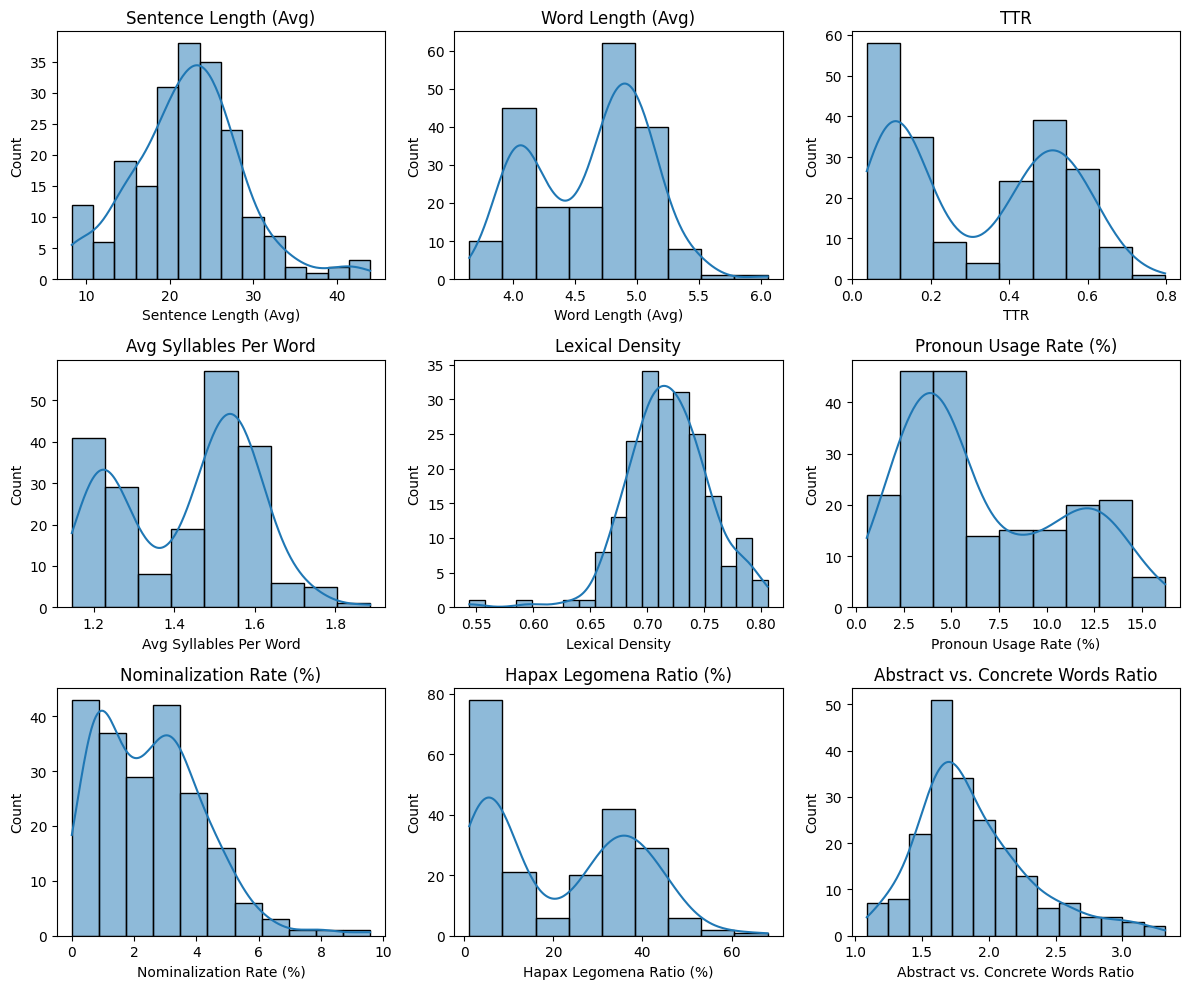

In [ ]:
import pandas as pd
from scipy.stats import shapiro, normaltest
import matplotlib.pyplot as plt
import seaborn as sns

df_combined = pd.read_csv("Dukes_complex_readability_analysis_complete.csv")

columns_to_test = [
    "Sentence Length (Avg)", "Word Length (Avg)", "TTR", "Avg Syllables Per Word",
    "Lexical Density", "Pronoun Usage Rate (%)", "Nominalization Rate (%)",
    "Hapax Legomena Ratio (%)", "Abstract vs. Concrete Words Ratio",
    "Flesch Reading Ease", "Flesch-Kincaid Grade Level", "SMOG Index",
    "Dale-Chall Readability Score", "Automated Readability Index",
    "Gunning Fog Index", "Linsear Write Formula", "FORCAST Readability Score"
]
normality_results = {}

for col in columns_to_test:
    stat, p_value = shapiro(df_combined[col].dropna())
    normality_results[col] = p_value

for col, p in normality_results.items():
    print(f"{col}: p-value = {p:.5f}")

plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_to_test[:9]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_combined[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [4]:
df_subset = df_combined[[
    "Sentence Length (Avg)", "Word Length (Avg)", "TTR", "Avg Syllables Per Word",
    "Lexical Density", "Pronoun Usage Rate (%)", "Nominalization Rate (%)",
    "Hapax Legomena Ratio (%)", "Abstract vs. Concrete Words Ratio",
    "Flesch Reading Ease", "Flesch-Kincaid Grade Level", "SMOG Index",
    "Dale-Chall Readability Score", "Automated Readability Index",
    "Gunning Fog Index", "Linsear Write Formula", "FORCAST Readability Score"
]]
df_characteristics = df_subset[["Sentence Length (Avg)", "Word Length (Avg)", "TTR", "Avg Syllables Per Word",
    "Lexical Density", "Pronoun Usage Rate (%)", "Nominalization Rate (%)",
    "Hapax Legomena Ratio (%)", "Abstract vs. Concrete Words Ratio"]]

df_metrics = df_combined[[ "Flesch Reading Ease", "Flesch-Kincaid Grade Level", "SMOG Index",
    "Dale-Chall Readability Score", "Automated Readability Index",
    "Gunning Fog Index", "Linsear Write Formula", "FORCAST Readability Score"]]

In [18]:
df_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Sentence Length (Avg)              205 non-null    float64
 1   Word Length (Avg)                  205 non-null    float64
 2   TTR                                205 non-null    float64
 3   Avg Syllables Per Word             205 non-null    float64
 4   Lexical Density                    205 non-null    float64
 5   Pronoun Usage Rate (%)             205 non-null    float64
 6   Nominalization Rate (%)            205 non-null    float64
 7   Hapax Legomena Ratio (%)           205 non-null    float64
 8   Abstract vs. Concrete Words Ratio  205 non-null    float64
dtypes: float64(9)
memory usage: 14.5 KB


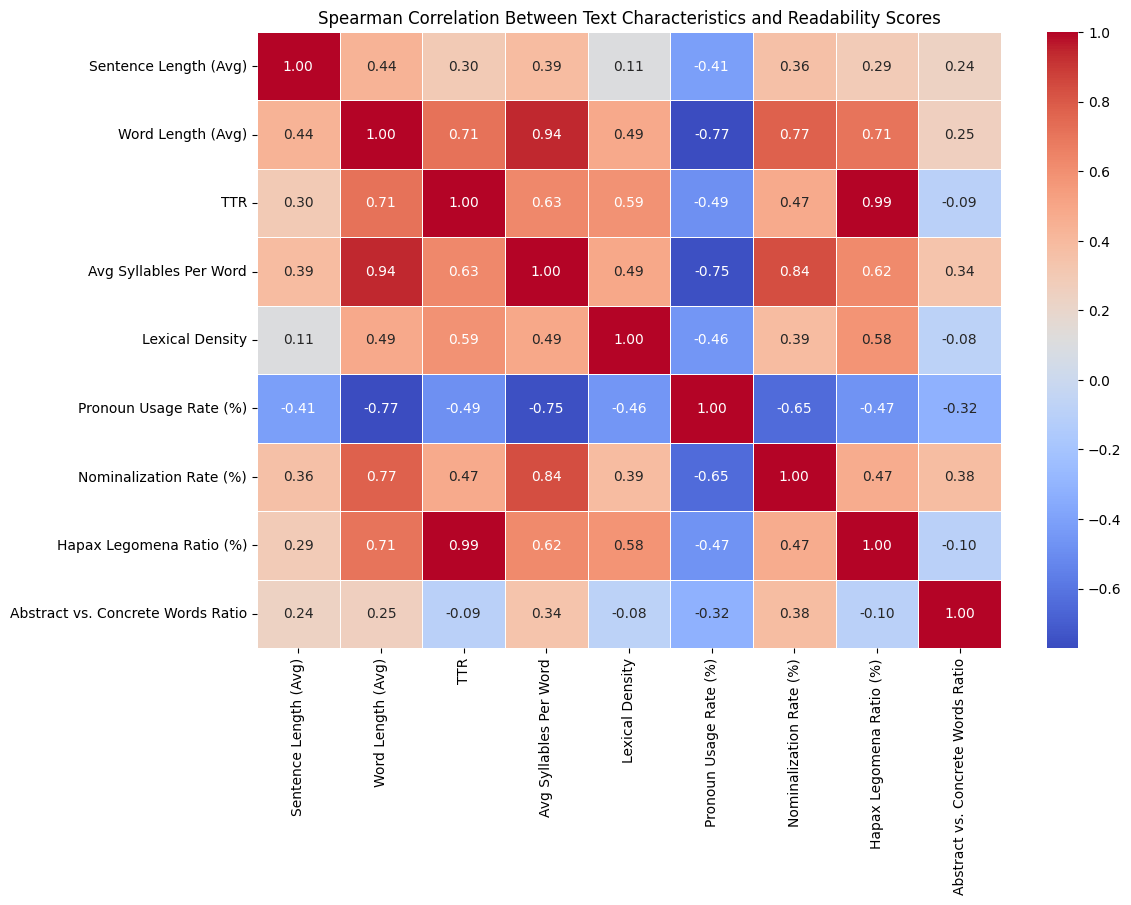

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

spearman_correlation_matrix = df_characteristics.corr(method="spearman")

plt.figure(figsize=(12, 8))

sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Spearman Correlation Between Text Characteristics and Readability Scores")

plt.show()


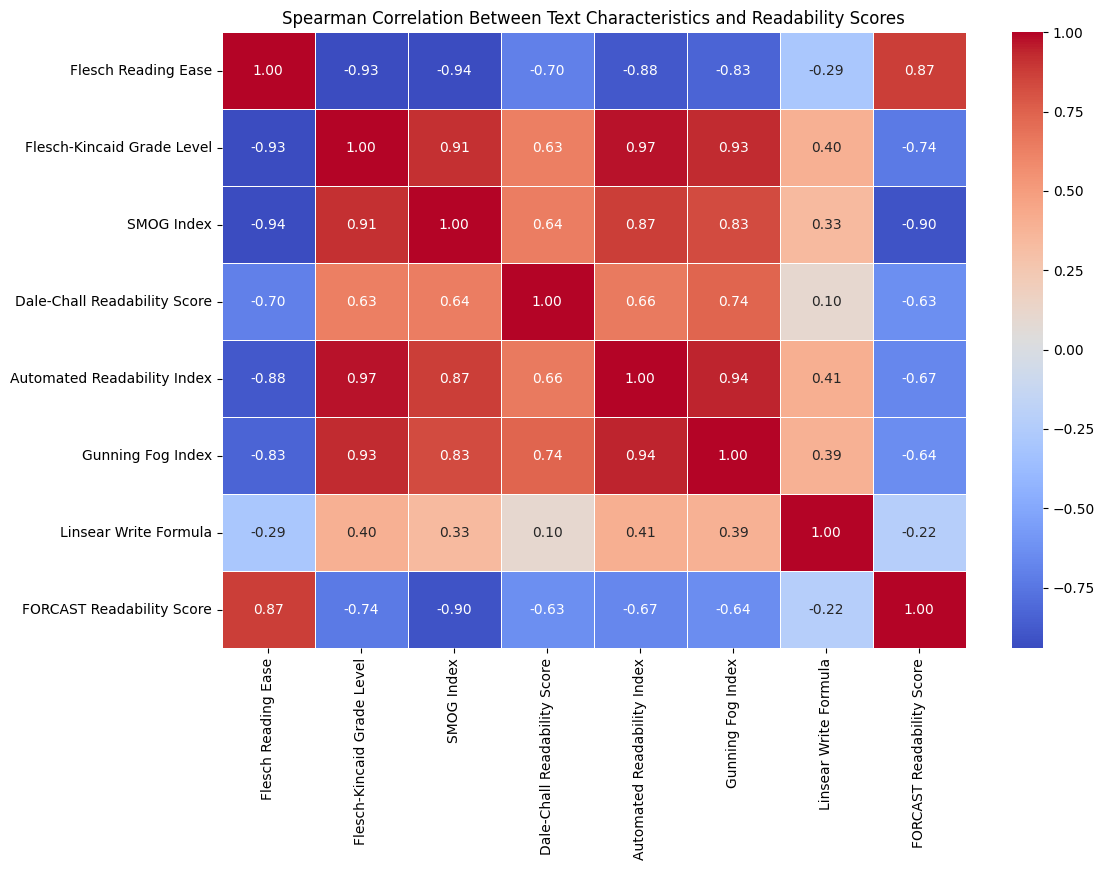

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

spearman_correlation_matrix = df_metrics.corr(method="spearman")

plt.figure(figsize=(12, 8))

sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Spearman Correlation Between Text Characteristics and Readability Scores")

plt.show()

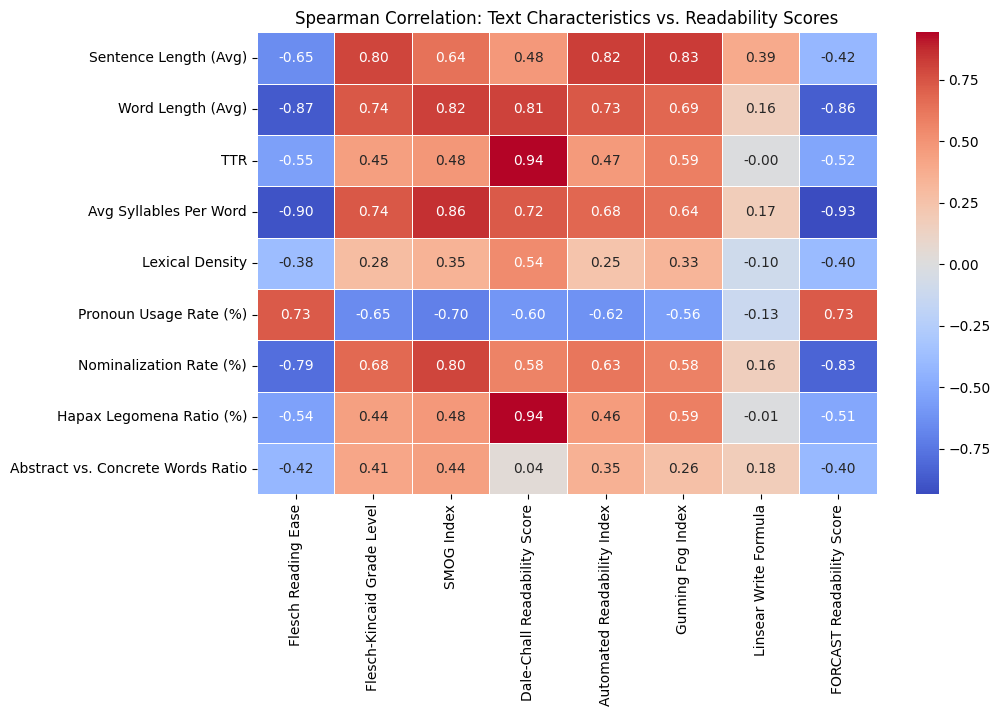

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

text_characteristics = [
    "Sentence Length (Avg)", "Word Length (Avg)", "TTR", "Avg Syllables Per Word",
    "Lexical Density", "Pronoun Usage Rate (%)", "Nominalization Rate (%)",
    "Hapax Legomena Ratio (%)", "Abstract vs. Concrete Words Ratio"
]

readability_metrics = [
    "Flesch Reading Ease", "Flesch-Kincaid Grade Level", "SMOG Index",
    "Dale-Chall Readability Score", "Automated Readability Index",
    "Gunning Fog Index", "Linsear Write Formula", "FORCAST Readability Score"
]

spearman_correlation_matrix = df_subset.corr(method="spearman")

filtered_correlation = spearman_correlation_matrix.loc[text_characteristics, readability_metrics]

plt.figure(figsize=(10, 6))

sns.heatmap(filtered_correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Spearman Correlation: Text Characteristics vs. Readability Scores")

plt.show()


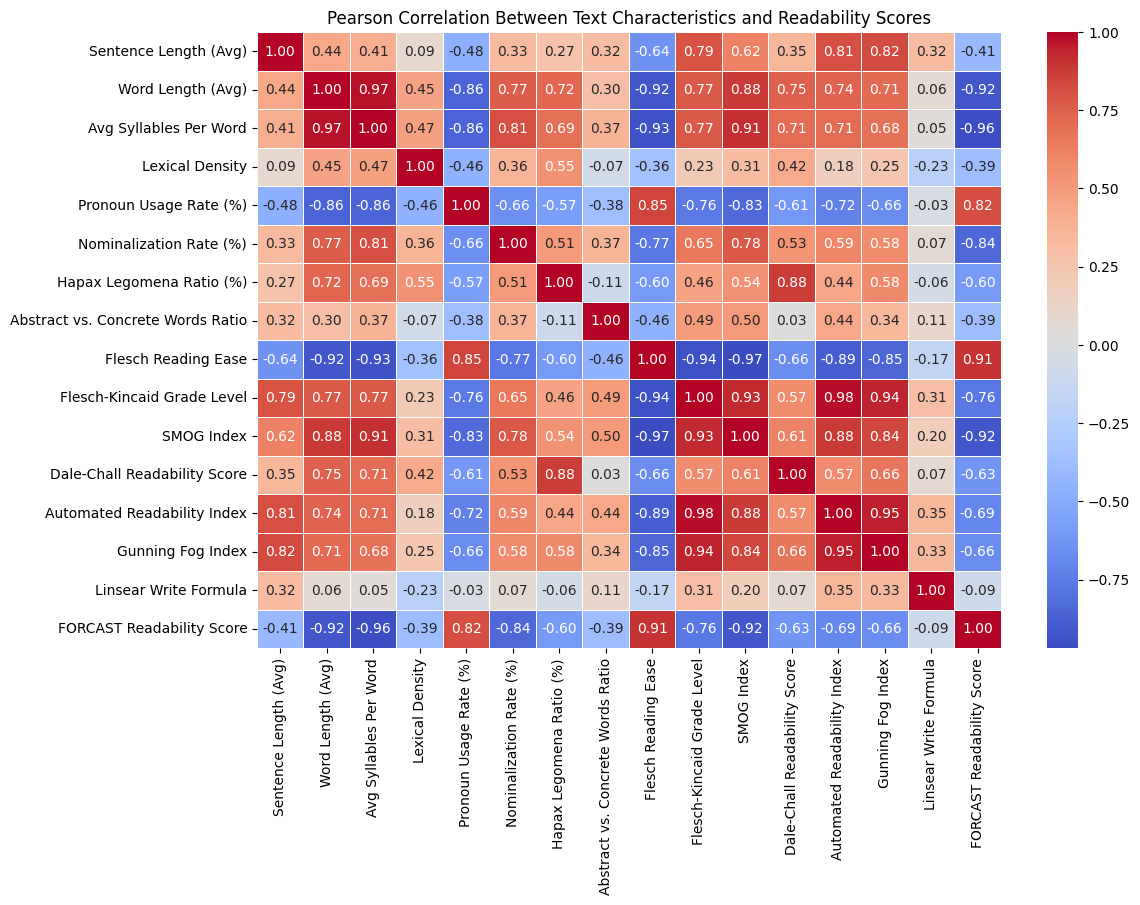

In [ ]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("Dukes_complex_readability_analysis_complete.csv")

text_characteristics = ["Sentence Length (Avg)", "Word Length (Avg)", "Avg Syllables Per Word", 
                        "Lexical Density", "Pronoun Usage Rate (%)", "Nominalization Rate (%)",
                        "Hapax Legomena Ratio (%)", "Abstract vs. Concrete Words Ratio"]

readability_scores = ["Flesch Reading Ease", "Flesch-Kincaid Grade Level", "SMOG Index", 
                      "Dale-Chall Readability Score", "Automated Readability Index", 
                      "Gunning Fog Index", "Linsear Write Formula", "FORCAST Readability Score"]

correlation_results = df[text_characteristics + readability_scores].corr(method="pearson")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_results, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Between Text Characteristics and Readability Scores")
plt.show()

In [ ]:
correlation_pairs = correlation_results.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

sorted_correlations = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

import pandas as pd
from IPython.core.display import display, HTML

html_table = sorted_correlations.head(30).to_html(index=False)
display(HTML(html_table))


C:\Users\adams\AppData\Local\Temp\ipykernel_28136\842432172.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


Feature 1,Feature 2,Correlation
Automated Readability Index,Flesch-Kincaid Grade Level,0.977660
Flesch-Kincaid Grade Level,Automated Readability Index,0.977660
Word Length (Avg),Avg Syllables Per Word,0.970866
Avg Syllables Per Word,Word Length (Avg),0.970866
SMOG Index,Flesch Reading Ease,-0.968995
Flesch Reading Ease,SMOG Index,-0.968995
FORCAST Readability Score,Avg Syllables Per Word,-0.960376
Avg Syllables Per Word,FORCAST Readability Score,-0.960376
Gunning Fog Index,Automated Readability Index,0.953439
Automated Readability Index,Gunning Fog Index,0.953439


Accuracy: 0.95

Classification Report:
                  precision    recall  f1-score   support

 Academic Books       1.00      0.80      0.89         5
Childrens Books       1.00      1.00      1.00         7
  News Articles       1.00      0.95      0.97        19
         Poetry       0.78      1.00      0.88         7

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.93        38
   weighted avg       0.96      0.95      0.95        38



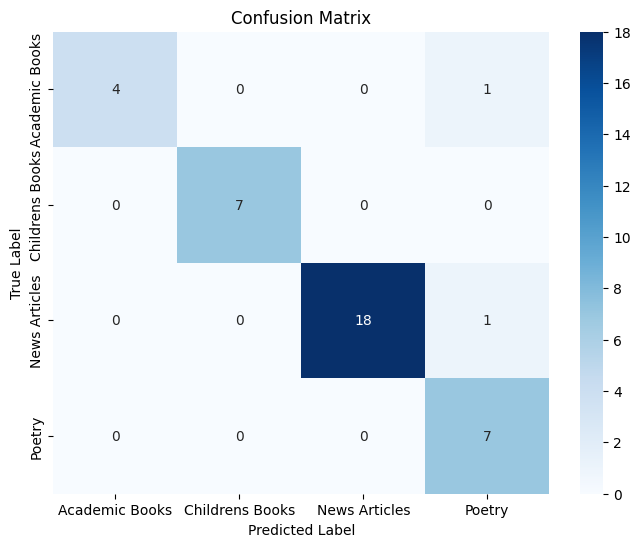

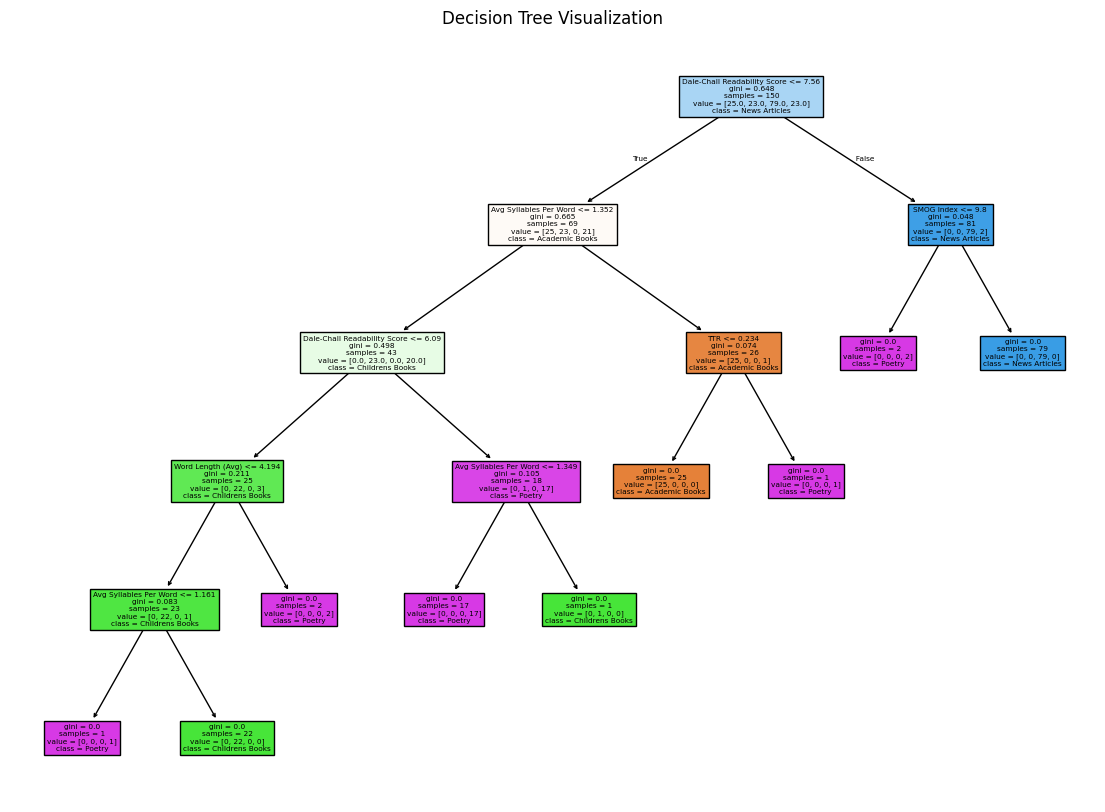

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "Dukes_complex_readability_analysis_complete.xlsx" 
df = pd.read_excel(file_path)

df = df.dropna()

feature_columns = ['Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Avg Syllables Per Word', 'Lexical Density', 'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 'Abstract vs. Concrete Words Ratio', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score']
target_column = "Genre" 

X = df[feature_columns].astype(float)
y = df[target_column] 


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(14, 10))
plot_tree(clf, feature_names=feature_columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

<h1>THE FOLLOWING CODE PRODUCED THE RESULTS USED IN THE FINAL VERSION OF THE THESIS!</h1>

In [ ]:
import numpy as np
import pandas as pd
import nltk
import textstat
import os
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

df_words = pd.read_csv("categorized_words.csv")

ABSTRACT_WORDS = set(df_words[df_words["Category"] == "Abstract"]["Word"].str.lower())
CONCRETE_WORDS = set(df_words[df_words["Category"] == "Concrete"]["Word"].str.lower())

PRONOUNS = {word.lower() for word in [
    "i", "me", "my", "mine", "myself", "we", "us", "our", "ours", "ourselves",
    "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
    "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",

    "thou", "thee", "thy", "thine", "ye", "your", "yours", "yourself", "yourselves",

    "ic", "me", "min", "mec", "mīn", "mē", "þu", "þe", "þīn", "þec", "þē",

    "wit", "unc", "uncer", "we", "us", "ūser", "ūre",

    "git", "inc", "incer", "ge", "eow", "eower",

    "he", "hine", "his", "him",
    "heo", "hie", "hi", "hire", "heo",
    "hit", "his", "him",
    "hie", "hira", "heora", "heom"
]}


NOMINALIZATION_SUFFIXES = ["ment", "tion", "sion", "ance", "ence", "ity", "ness", "ism", "ship"]

def count_polysyllabic_words(words):
    return sum(1 for word in words if word.isalpha() and textstat.syllable_count(word) >= 3)


def compute_forcast_score_adjusted(text, num_samples=5, sample_size=150):
    words = word_tokenize(text)
    if len(words) < sample_size:
        return None

    sample_scores = []
    for _ in range(num_samples):
        sample_words = random.sample(words, sample_size)
        sample_scores.append(20 - (count_polysyllabic_words(sample_words) / 10))

    return np.mean(sample_scores)

def count_nominalizations(words):
    return sum(1 for word in words if any(word.endswith(suffix) for suffix in NOMINALIZATION_SUFFIXES))

def compute_abstract_vs_concrete_ratio(words):
    num_abstract = sum(1 for word in words if word in ABSTRACT_WORDS)
    num_concrete = sum(1 for word in words if word in CONCRETE_WORDS)
    return num_abstract / num_concrete if num_concrete > 0 else 0

def compute_linsear_write_with_sentence_sampling(text, sample_sentences=10):
    sentences = sent_tokenize(text)
    if len(sentences) < sample_sentences:
        sample = sentences
    else:
        sample = random.sample(sentences, sample_sentences)
    sample_text = " ".join(sample)
    return textstat.linsear_write_formula(sample_text)

def compute_text_statistics(file_path):
    book_name = os.path.basename(file_path).split('.')[0]
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
        
        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha()]

        num_chars = len(text)
        num_words = len(words)
        num_unique_words = len(set(words))
        unique_to_total_ratio = num_unique_words / num_words if num_words > 0 else 0
        num_sentences = len(sentences)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
        avg_word_length = np.mean([len(word) for word in words]) if words else 0
        avg_syllables_per_word = sum(textstat.syllable_count(word) for word in words) / num_words if num_words > 0 else 0
        
        lexical_density = sum(1 for word in words if wordnet.synsets(word)) / num_words if num_words else 0
        pronoun_usage = sum(1 for word in words if word in PRONOUNS) / num_words * 100 if num_words else 0
        nominalization_rate = count_nominalizations(words) / num_words * 100 if num_words else 0
        hapax_legomena_ratio = sum(1 for word in set(words) if words.count(word) == 1) / num_words * 100 if num_words else 0
        abstract_vs_concrete_ratio = compute_abstract_vs_concrete_ratio(words)

        readability_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(text),
            "Flesch-Kincaid Grade Level": textstat.flesch_kincaid_grade(text),
            "SMOG Index": textstat.smog_index(text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(text),
            "Automated Readability Index": textstat.automated_readability_index(text),
            "Gunning Fog Index": textstat.gunning_fog(text),
            "Linsear Write Formula": compute_linsear_write_with_sentence_sampling(text),
            "FORCAST Readability Score": compute_forcast_score_adjusted(text),
        }

        text_stats = {
            "Book Name": book_name,
            "Sentence Length (Avg)": avg_sentence_length,
            "Total Words": num_words,
            "Word Length (Avg)": avg_word_length,
            "Total Sentences": num_sentences,
            "Initial Text Length (Chars)": num_chars,
            "Unique Lemmas": len(set(words)),
            "TTR": unique_to_total_ratio,
            "Avg Syllables Per Word": avg_syllables_per_word,
            "Lexical Density": lexical_density,
            "Pronoun Usage Rate (%)": pronoun_usage,
            "Nominalization Rate (%)": nominalization_rate,
            "Hapax Legomena Ratio (%)": hapax_legomena_ratio,
            "Abstract vs. Concrete Words Ratio": abstract_vs_concrete_ratio,
        }
        text_stats.update(readability_scores)
        return text_stats
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_multiple_files(directory_path, output_csv="text_analysis_results.csv"):
    all_results = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(directory_path, file_name)
            result = compute_text_statistics(file_path)
            if result:
                all_results.append(result)
    df_results = pd.DataFrame(all_results)
    df_results.to_csv(output_csv, index=False, encoding='utf-8')
    return df_results


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adams\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Rozšírený dataset\Literatúra pre deti"
df = analyze_multiple_files(directory_path)

df.to_csv("Dukes_complex_readability_analysis_childrens_books_expanded.csv", index=False)

df.head(10)

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Alices_Adventures_in_Wonderland_Lewis_Carroll,15.001567,9571,3.998746,638,53020,1431,0.149514,1.233622,0.694180,...,6.864486,1.588270,88.67,5.0,7.6,5.68,7.4,7.13,6.571429,19.62
1,Andersens_Fairy_Tales,22.857321,54949,4.074323,2404,298858,4940,0.089902,1.233089,0.700686,...,4.196619,1.724251,85.83,6.1,8.5,5.62,8.7,8.34,7.833333,19.42
2,A_Christmas_Carol_Charles_Dickens,14.537590,28232,4.188368,1942,157788,4135,0.146465,1.252550,0.718157,...,8.214083,1.783508,80.01,6.2,8.2,6.08,8.2,7.67,11.200000,19.32
3,A_Little_Girl_in_Old_Detroit_Amanda_M_Douglas,12.751911,91750,4.150322,7195,497776,7170,0.078147,1.238354,0.700436,...,3.566213,1.815435,92.02,3.7,7.5,5.25,5.7,5.88,5.625000,19.40
4,Blacky_The_Crow_Thornton_W_Burgess,14.895778,22582,3.937827,1516,117932,1757,0.077805,1.167789,0.709725,...,2.900540,1.794174,90.09,4.4,6.5,1.35,5.7,6.26,6.285714,19.56
5,Black_Beauty_Anna_Sewell,23.342126,59289,3.800401,2540,301974,3812,0.064295,1.176609,0.724047,...,2.651419,1.709945,80.75,8.0,7.5,1.87,9.7,9.98,7.666667,19.64
6,Bowser_the_Hound_Thornton_W_Burgess,15.281116,21363,3.988672,1398,112579,1868,0.087441,1.208819,0.719375,...,3.332865,1.756883,89.89,4.5,6.7,1.46,5.8,6.39,5.500000,19.56
7,Daddy_Long_Legs_Jean_Webster,14.341797,36715,4.107912,2560,216010,4685,0.127605,1.302056,0.720605,...,6.798311,1.723491,81.93,5.5,8.7,5.81,6.9,6.91,7.285714,19.32
8,Grimms_Fairy_Tales,23.462274,88312,3.917350,3764,472077,4337,0.049110,1.181685,0.674948,...,1.773258,1.496836,87.55,5.4,7.1,1.39,7.2,7.22,6.285714,19.70
9,Heidi_Johanna_Spyri,13.421505,49928,4.148694,3720,273906,3648,0.073065,1.261757,0.674932,...,3.124499,1.548137,82.75,5.2,7.9,1.44,6.3,6.05,6.714286,19.44


In [3]:
df.describe()

,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,Pronoun Usage Rate (%),...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,17.109677,47945.160000,4.037800,2820.660000,261638.180000,4065.640000,0.098375,1.229206,0.702740,11.873560,...,4.691564,1.578870,85.257000,5.452000,7.62600,4.497600,7.326000,7.108600,7.865546,19.553200
std,4.446561,27136.594709,0.137009,1511.120217,147114.334516,1936.501809,0.047845,0.040163,0.021046,1.520139,...,3.343671,0.205639,5.428912,1.375179,0.96316,1.841191,1.552853,1.334862,4.836833,0.176154
min,9.863295,962.000000,3.584831,57.000000,5768.000000,371.000000,0.047671,1.154811,0.667718,7.829209,...,1.757238,0.649994,71.580000,2.900000,5.80000,1.160000,4.800000,4.720000,3.777778,19.120000
25%,14.390745,23817.750000,3.951350,1599.750000,127890.000000,2014.250000,0.077891,1.200038,0.685547,10.843978,...,3.517310,1.508747,81.780000,4.525000,7.00000,2.670000,6.350000,6.152500,5.625000,19.420000
50%,16.014089,48684.500000,4.046465,2669.000000,272952.000000,4355.500000,0.089348,1.226167,0.700561,12.159487,...,4.046530,1.587985,85.830000,5.300000,7.70000,5.430000,7.150000,7.085000,6.714286,19.600000
75%,19.845044,64261.500000,4.120025,3753.000000,355045.500000,5374.000000,0.103602,1.252028,0.716855,12.926484,...,4.911890,1.723153,89.580000,6.100000,8.00000,5.620000,8.275000,7.665000,7.791667,19.660000
max,29.420592,123660.000000,4.352391,7195.000000,649221.000000,8700.000000,0.385655,1.350312,0.753991,14.433048,...,25.779626,1.914652,94.150000,9.500000,10.10000,6.320000,12.400000,10.910000,28.000000,19.880000


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Rozšírený dataset\Odborná literatúra"
df_academic_expanded = analyze_multiple_files(directory_path)

df_academic_expanded.to_csv("Dukes_complex_readability_analysis_academic_books_expanded.csv", index=False)

df_academic_expanded.head(10)

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,A-B-C_of_Electricity_Wm_H_Meadowcroft,24.933931,22266,4.323947,893,125908,1860,0.083535,1.351567,0.693434,...,3.152789,2.094956,60.08,11.8,12.1,5.94,13.8,11.92,30.000000,18.78
1,Animal_Sanctuaries_in_Labrador_William_Wood,20.389662,10256,4.606084,503,60572,2314,0.225624,1.429797,0.731182,...,13.153276,2.588633,67.79,8.8,11.8,7.16,11.5,10.32,9.000000,18.64
2,Applied_Psychology_for_Nurses_Mary_F_Porter,21.053457,36233,4.581293,1721,222044,4338,0.119725,1.456959,0.703088,...,5.726824,3.118745,57.91,10.6,12.6,6.24,12.2,10.25,15.500000,18.24
3,A_Theory_of_Creation_A_Review_of_'Vestiges_of_...,32.214180,21809,4.710670,677,131447,3428,0.157183,1.524875,0.692145,...,8.221376,3.110922,46.85,14.8,15.7,7.31,18.1,15.29,32.500000,18.32
4,Bronchoscopy_and_Esophagoscopy_Chevalier_Jackson,16.687514,74443,5.011526,4461,479524,5909,0.079376,1.580605,0.712129,...,2.987521,2.279710,52.09,10.7,13.2,5.72,12.7,8.94,12.200000,18.10
5,Cattle_and_Their_Diseases_Robert_Jennings,24.170595,90253,4.588667,3734,538839,7450,0.082546,1.436318,0.708231,...,3.468029,2.336661,54.05,12.1,13.0,6.06,14.3,11.24,8.285714,18.34
6,Cave_Regions_of_the_Ozarks_and_Black_Hills_Lue...,31.305642,50496,4.545964,1613,292293,5456,0.108048,1.406389,0.717978,...,4.917221,1.940965,56.02,13.4,13.1,6.55,16.7,13.91,20.333333,19.00
7,Chlorination_of_Water_Joseph_Race,15.675524,33624,5.063437,2145,258042,3643,0.108345,1.607661,0.705954,...,4.529503,2.432419,53.51,10.2,12.4,6.06,13.3,8.50,12.800000,18.38
8,Common_Diseases_of_Farm_Animals,15.067935,84727,4.762921,5623,528041,5514,0.065080,1.513095,0.709195,...,2.240136,1.902507,63.19,8.5,12.0,5.42,10.4,7.51,8.428571,18.30
9,Electric_Transmission_of_Water_Power_Alton_D_A...,26.919797,106064,4.610141,3940,681192,3891,0.036685,1.451605,0.710533,...,1.128564,2.005378,52.94,12.5,13.4,1.82,15.0,11.02,21.333333,18.54


In [5]:
df_academic_expanded.describe()

,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,Pronoun Usage Rate (%),...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.193264,61142.860000,4.686529,2726.460000,3.852699e+05,4994.240000,0.107817,1.483195,0.704015,3.900157,...,5.100335,2.431649,54.382400,12.054000,13.392000,6.142000,14.720000,11.635000,16.319762,18.436400
std,8.802306,43891.323538,0.246841,2100.552777,2.742984e+05,2260.490885,0.048713,0.071644,0.024217,1.568765,...,3.021317,0.444359,8.428795,3.011692,1.531684,1.208251,3.630146,3.339381,9.654085,0.310383
min,10.618818,6545.000000,3.644095,141.000000,3.642500e+04,1258.000000,0.036685,1.332908,0.661234,0.951701,...,1.128564,1.564333,27.600000,7.200000,10.200000,1.820000,9.700000,5.880000,5.100000,17.800000
25%,20.265801,29524.000000,4.585172,1107.000000,1.911225e+05,3501.000000,0.071967,1.437982,0.691079,2.733671,...,2.669629,2.094898,50.200000,10.300000,12.425000,5.827500,12.550000,10.015000,11.450000,18.245000
50%,23.360685,50079.500000,4.707231,2125.500000,2.942565e+05,4783.500000,0.102074,1.479768,0.704689,4.074050,...,4.487226,2.398803,54.205000,11.650000,13.200000,6.230000,14.050000,10.955000,12.700000,18.400000
75%,31.676264,84175.000000,4.803286,3966.250000,5.361395e+05,6035.000000,0.132685,1.527886,0.714814,4.844603,...,6.359152,2.759802,59.537500,13.325000,14.575000,6.792500,16.075000,13.545000,20.000000,18.655000
max,59.720128,205696.000000,5.114933,9818.000000,1.315520e+06,10757.000000,0.239111,1.619867,0.773939,7.752601,...,13.290902,3.319433,68.100000,24.300000,16.600000,7.960000,30.300000,24.770000,62.000000,19.000000


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Rozšírený dataset\Poézia"
df_poetry_expanded = analyze_multiple_files(directory_path)

df_poetry_expanded.to_csv("Dukes_complex_readability_analysis_poetry_expanded.csv", index=False)

df_poetry_expanded.head(10)

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Aurora_Leigh_Elizabeth_Barret_Browning,27.371111,86219,4.047727,3150,533503,8392,0.097334,1.220694,0.711838,...,4.981501,1.679483,83.09,7.1,8.9,6.09,10.8,9.52,10.800000,19.46
1,A_Dome_of_Many-Coloured_Glass_Amy_Lowell,21.992714,12074,4.330048,549,85857,3033,0.251201,1.254183,0.723538,...,15.123406,1.497877,73.31,8.8,8.7,7.48,11.6,10.37,6.857143,19.60
2,A_Shropshire_Lad_A_E_Housman,25.220339,8928,4.013329,354,62758,2088,0.233871,1.169915,0.698925,...,14.191308,1.487874,79.74,8.4,7.4,7.08,11.3,10.67,10.200000,19.86
3,Birds_Beasts_and_Flowers_D_H_Lawrence,17.260234,23612,4.237633,1368,157129,4354,0.184398,1.290827,0.707776,...,10.308318,1.416859,79.19,6.5,9.4,6.78,9.6,8.29,10.800000,19.34
4,Divine_Comedy_Dante_Alighieri,35.256605,116100,4.252326,3293,682140,10006,0.086184,1.283428,0.670396,...,4.188630,2.149776,67.12,11.2,10.1,6.28,14.3,12.54,18.666667,19.60
5,Endymion_A_Poetic_Romance_John_Keats,23.044275,30188,4.286803,1310,192022,5365,0.177720,1.250828,0.719458,...,9.517027,1.687391,71.99,9.3,8.9,7.19,12.7,10.76,8.500000,19.56
6,Fragments_of_Ancient_Poetry_James_Macpherson,12.861206,11305,4.236798,879,66990,2200,0.194604,1.274834,0.642548,...,10.791685,1.709814,82.95,5.1,8.2,6.52,6.6,6.85,6.500000,19.42
7,Fruit-Gathering_Rabindranath_Tagore,19.373358,10326,3.943153,533,54467,2037,0.197269,1.176060,0.658144,...,11.398412,1.497564,87.35,5.5,6.4,6.34,7.0,7.58,9.000000,19.84
8,Great_Poems_of_the_World_War_William_Dunseath_...,23.260442,37868,4.075895,1628,228750,5876,0.155171,1.207273,0.693541,...,8.577163,1.474000,84.10,6.7,8.0,6.63,10.0,8.99,10.800000,19.56
9,Idylls_of_the_King_Baron_Alfred_Tennyson,42.005066,82918,4.030404,1974,476332,6615,0.079778,1.171169,0.674787,...,3.584264,1.578094,73.55,10.8,8.2,6.21,14.7,12.90,5.500000,19.78


In [7]:
df_poetry_expanded.describe()

,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,Pronoun Usage Rate (%),...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,22.012696,42788.960000,4.159483,1897.940000,2.590933e+05,4605.740000,0.191954,1.233589,0.703297,9.803730,...,11.175420,1.646264,77.953400,8.054000,8.482000,6.746000,11.116000,9.967000,10.907254,19.550800
std,7.214635,70258.217094,0.199424,3464.334771,4.298132e+05,3641.605044,0.090358,0.065843,0.028525,2.173714,...,6.937263,0.314797,8.855896,2.552087,1.608738,1.037568,3.369513,2.425786,3.745249,0.250557
min,9.308849,1631.000000,3.744384,77.000000,1.051800e+04,725.000000,0.037061,1.145696,0.627631,3.414112,...,1.472616,1.088407,52.800000,3.500000,5.900000,1.600000,5.100000,5.440000,4.666667,18.660000
25%,17.107938,7886.750000,4.033454,356.750000,5.128325e+04,1971.750000,0.127678,1.185811,0.684144,8.472347,...,5.844151,1.461033,73.550000,6.325000,7.325000,6.292500,8.575000,8.047500,7.875000,19.430000
50%,21.436307,22641.500000,4.155922,1011.500000,1.355670e+05,3252.500000,0.174218,1.211940,0.705282,9.594779,...,9.699425,1.598920,79.210000,7.600000,8.350000,6.705000,10.550000,9.470000,10.800000,19.580000
75%,25.951542,42460.250000,4.274442,2187.750000,2.689305e+05,6235.000000,0.243438,1.273452,0.719385,10.878923,...,14.180904,1.793232,84.175000,9.600000,9.175000,7.272500,13.325000,11.362500,13.250000,19.735000
max,43.992278,451713.000000,4.822342,24044.000000,2.796731e+06,16741.000000,0.444513,1.475716,0.804726,14.390858,...,32.495402,2.598775,92.530000,16.700000,13.200000,8.730000,22.500000,18.420000,18.666667,19.900000


In [ ]:

directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Rozšírený dataset\Žurnalistika\BBC"
df_bbc_expanded = analyze_multiple_files(directory_path)

df_bbc_expanded.to_csv("Dukes_complex_readability_analysis_bbc_expanded.csv", index=False)

df_bbc_expanded.head(10)

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,"About 75,000 still without power in NI after S...",19.812500,634,4.794953,32,3903,313,0.493691,1.422713,0.719243,...,34.227129,1.532020,67.79,8.8,10.6,8.72,12.1,10.45,8.333333,18.76
1,Argentina president faces impeachment calls ov...,21.533333,323,5.052632,15,2061,186,0.575851,1.597523,0.705882,...,43.962848,1.793814,50.77,11.2,13.8,9.98,13.6,13.19,9.000000,17.66
2,Australia accuses China of 'unsafe' fighter je...,26.076923,339,5.303835,13,2237,175,0.516224,1.622419,0.793510,...,36.873156,1.250000,44.78,13.5,13.6,9.88,17.7,14.61,13.000000,18.32
3,"Austria attack that killed teen linked to IS, ...",23.647059,402,4.873134,17,2508,211,0.524876,1.547264,0.773632,...,36.567164,1.507353,55.37,11.5,13.5,9.49,14.5,13.48,11.600000,18.32
4,Author Cottrell-Boyce holds summit to warn abo...,24.300000,729,4.659808,30,4471,353,0.484225,1.434842,0.739369,...,33.196159,1.909502,64.04,10.3,12.1,8.59,14.1,12.56,13.200000,18.58
5,"Confident, organised, still freewheeling Trump 2",28.115385,1462,4.796854,52,9060,657,0.449384,1.500000,0.748290,...,34.062927,1.724444,51.31,13.1,14.0,9.45,16.3,14.84,10.833333,18.26
6,Detained Ugandan opposition figure treated in ...,19.121212,631,4.741680,33,3827,287,0.454834,1.546751,0.714739,...,31.378764,1.236052,60.35,9.6,13.2,8.63,11.6,10.92,8.833333,17.78
7,Dozens killed in Mali illegal gold mine collapse,19.000000,437,4.901602,23,2717,234,0.535469,1.524027,0.780320,...,37.757437,1.478571,60.24,9.7,11.6,9.20,12.1,11.26,11.333333,18.48
8,Federal employees asked to report colleagues w...,23.500000,94,5.500000,4,632,75,0.797872,1.723404,0.787234,...,68.085106,1.961538,38.86,13.8,15.9,11.47,17.0,15.41,16.875000,NaN
9,Five takeaways from the Munich Security Confer...,18.324324,678,4.815634,37,4219,321,0.473451,1.522124,0.752212,...,33.185841,1.663265,57.71,10.7,13.1,9.27,12.9,12.52,12.600000,18.26


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Rozšírený dataset\Žurnalistika\Reuters"
df_reuters_expanded = analyze_multiple_files(directory_path)

df_reuters_expanded.to_csv("Dukes_complex_readability_analysis_reuters_expanded.csv", index=False)

df_reuters_expanded.head(10)

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Aboriginal group seeks $1,23.550000,471,5.050955,20,3039,237,0.503185,1.554140,0.711253,...,35.668790,1.653061,52.49,10.6,11.9,9.61,12.7,10.78,7.250000,18.42
1,"After Toronto plane crash, Delta says 19 out o...",24.444444,220,4.804545,9,1462,135,0.613636,1.454545,0.790909,...,44.090909,1.276316,72.05,7.2,9.7,10.83,10.4,9.58,10.500000,19.14
2,Bloom Energy and Chart Industries enter carbon...,25.166667,151,5.377483,6,1086,101,0.668874,1.721854,0.781457,...,48.344371,1.272727,33.85,13.6,15.1,11.04,15.4,15.28,11.833333,17.70
3,Dozens of false killer whales stranded on remo...,22.142857,155,5.232258,7,1045,108,0.696774,1.567742,0.754839,...,57.419355,1.277778,61.36,9.2,12.1,11.63,12.8,12.17,10.500000,18.36
4,"Even before Trump, Black-led businesses say DE...",25.826087,1188,5.350168,46,8111,515,0.433502,1.678451,0.731481,...,28.787879,2.079208,40.28,13.2,15.2,9.24,16.1,13.09,15.000000,17.74
5,Florence bans check-in keyboxes as Italy acts ...,26.300000,263,5.019011,10,1786,173,0.657795,1.551331,0.749049,...,50.570342,1.612500,51.18,11.1,12.8,10.27,13.9,12.00,11.800000,18.20
6,Gaza Arab plan may involve up to $20 billion r...,27.266667,409,4.929095,15,2561,214,0.523227,1.501222,0.733496,...,36.919315,2.080000,56.18,11.2,13.0,9.26,14.2,13.26,15.250000,18.22
7,Germany's far-right AfD is shut out from power...,24.275000,971,4.923790,40,6205,493,0.507724,1.520082,0.721936,...,38.825953,2.052632,55.17,11.6,12.8,9.81,15.2,13.11,16.250000,18.56
8,HSBC delays net-zero emissions target by 20 years,30.375000,486,5.115226,16,3201,256,0.526749,1.584362,0.759259,...,37.448560,1.817518,50.06,11.5,13.0,9.70,14.1,12.54,16.000000,18.36
9,India postpones winter games in Kashmir citing...,27.272727,300,4.870000,11,1874,190,0.633333,1.500000,0.760000,...,49.000000,1.678161,53.65,12.2,12.6,10.61,15.1,13.83,16.000000,18.62


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Rozšírený dataset\Žurnalistika\Aljazeera"
df_aljazeera_expanded = analyze_multiple_files(directory_path)

df_aljazeera_expanded.to_csv("Dukes_complex_readability_analysis_aljazeera_expanded.csv", index=False)

df_aljazeera_expanded.head(10)

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,Andrew Tate and brother arrive in US after Rom...,26.000000,572,5.099650,22,3667,299,0.522727,1.631119,0.760490,...,37.062937,1.779874,44.88,13.5,15.3,10.17,16.8,14.92,16.250000,17.80
1,Anger mounts as Greece remembers deadliest tra...,24.061224,1179,4.888041,49,7305,532,0.451230,1.505513,0.726039,...,31.891433,1.797688,57.50,10.7,13.0,9.04,13.7,12.30,11.833333,18.10
2,Austria eyes new coalition government that exc...,24.384615,317,5.018927,13,2087,179,0.564669,1.504732,0.706625,...,40.063091,2.049383,54.76,11.8,13.4,9.56,16.6,12.77,15.250000,18.66
3,Bosnia peace envoy says Serb regional leaders ...,29.666667,445,5.444944,15,3010,219,0.492135,1.746067,0.662921,...,35.730337,2.227723,24.31,17.3,17.0,10.17,20.4,16.75,22.666667,17.66
4,BP drops climate targets in pivot back to oil ...,23.789474,452,4.845133,19,2862,226,0.500000,1.546460,0.734513,...,33.849558,1.702899,60.14,9.7,13.3,9.46,12.3,11.56,12.800000,18.04
5,California sues oil giants alleging ‘climate r...,27.736842,527,5.182163,19,3413,287,0.544592,1.624288,0.724858,...,40.417457,1.912752,44.48,13.7,14.9,10.45,17.3,15.45,16.750000,18.08
6,China pledges ‘countermeasures’ after Trump an...,29.300000,293,5.119454,10,1883,172,0.587031,1.580205,0.754266,...,45.392491,1.681818,41.13,15.0,14.7,10.51,18.3,16.91,16.500000,18.24
7,Israel army probe reveals ‘complete failure’ i...,24.304348,559,4.992844,23,3530,266,0.475850,1.577818,0.731664,...,35.062612,2.286765,47.62,12.5,13.0,9.11,15.0,12.80,11.200000,18.18
8,"Israel releases Palestinian prisoners, sends n...",25.333333,684,4.921053,27,4228,304,0.444444,1.523392,0.723684,...,29.678363,2.028736,54.86,11.7,13.5,8.97,14.9,13.12,13.000000,18.22
9,More rescuers join search for trapped workers ...,25.363636,279,5.114695,11,1766,165,0.591398,1.569892,0.777778,...,41.577061,1.170000,45.39,13.3,12.7,9.88,16.0,13.39,15.250000,18.52


In [ ]:
directory_path = r"C:\Users\adams\Documents\Dimplomová práca\Diplomovka\Texty\Rozšírený dataset\Žurnalistika\TechCrunch"
df_techcrunch_expanded = analyze_multiple_files(directory_path)

df_techcrunch_expanded.to_csv("Dukes_complex_readability_analysis_techcrunch_expanded.csv", index=False)

df_techcrunch_expanded.head(10)

,Book Name,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
0,AI Alexa and AI Siri face bugs and delays,19.857143,139,4.805755,7,848,88,0.633094,1.517986,0.726619,...,43.165468,2.451613,59.74,9.9,11.8,9.39,12.4,10.84,12.200000,18.54
1,AI and security startups blossom on cloudy days,19.291667,463,4.991361,24,3061,269,0.580994,1.531317,0.779698,...,44.276458,1.554795,62.98,8.6,10.9,10.74,11.9,9.58,8.714286,18.78
2,Airbnb CEO says it’s still too early for AI tr...,25.666667,462,4.636364,18,2817,233,0.504329,1.465368,0.774892,...,33.982684,2.050000,58.32,10.4,11.8,9.00,12.7,11.42,9.000000,18.40
3,Apple is reportedly exploring humanoid robots,22.666667,612,4.913399,27,3938,319,0.521242,1.547386,0.746732,...,39.379085,2.023121,49.55,11.7,13.2,9.58,14.2,13.18,12.200000,18.46
4,Avride launches sidewalk delivery bots on Uber...,26.055556,469,4.788913,18,2915,236,0.503198,1.515991,0.692964,...,35.394456,1.459459,57.00,10.9,13.6,9.74,13.9,13.25,17.000000,18.34
5,Barcelona-based spyware startup Variston shuts...,22.000000,176,5.210227,8,1158,106,0.602273,1.579545,0.698864,...,44.886364,1.660000,49.15,11.9,13.4,9.84,15.7,13.12,12.400000,18.10
6,Bluesky gets growth and analytics tools with B...,24.380952,512,4.914062,21,3210,268,0.523438,1.457031,0.724609,...,35.937500,2.759259,57.20,10.8,12.0,9.38,14.3,12.07,8.000000,18.66
7,China’s Salt Typhoon hackers continue to breac...,28.500000,342,6.055556,12,2654,182,0.532164,1.885965,0.789474,...,38.011696,1.797753,27.83,13.9,14.8,10.64,17.4,13.11,8.125000,16.88
8,Court filings show Meta paused efforts to lice...,41.714286,584,5.030822,14,3762,277,0.474315,1.556507,0.684932,...,31.164384,2.167832,45.39,13.3,14.5,9.40,16.5,14.54,16.250000,17.80
9,Data center tweaks could unlock 76 GW of new p...,19.833333,476,4.928571,24,2942,247,0.518908,1.596639,0.739496,...,37.394958,2.293103,52.19,10.7,12.8,9.50,12.3,12.06,12.600000,17.96


In [14]:
df_journalism_expanded = pd.DataFrame()
df_journalism_expanded = pd.concat([df_bbc_expanded, df_reuters_expanded, df_techcrunch_expanded, df_aljazeera_expanded], ignore_index=True)

In [15]:
df_journalism_expanded.describe()

,Sentence Length (Avg),Total Words,Word Length (Avg),Total Sentences,Initial Text Length (Chars),Unique Lemmas,TTR,Avg Syllables Per Word,Lexical Density,Pronoun Usage Rate (%),...,Hapax Legomena Ratio (%),Abstract vs. Concrete Words Ratio,Flesch Reading Ease,Flesch-Kincaid Grade Level,SMOG Index,Dale-Chall Readability Score,Automated Readability Index,Gunning Fog Index,Linsear Write Formula,FORCAST Readability Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000
mean,24.674706,616.390000,4.984233,26.000000,3905.110000,289.080000,0.519199,1.555535,0.739247,3.988126,...,37.142349,1.872270,52.104400,11.580000,13.195000,9.581000,14.433000,12.834100,12.998230,18.223636
std,4.542000,478.550038,0.239917,21.262667,3025.516611,170.593775,0.082500,0.081422,0.030694,1.659289,...,7.877364,0.371194,8.673878,1.869208,1.461587,0.757398,2.187848,1.809271,3.245836,0.432679
min,15.887097,94.000000,4.416667,4.000000,632.000000,75.000000,0.296869,1.390775,0.641176,0.568182,...,17.615994,1.170000,24.310000,7.200000,9.700000,7.580000,10.100000,9.120000,6.250000,16.620000
25%,21.484559,304.000000,4.822895,11.750000,1954.000000,174.750000,0.461012,1.506260,0.723247,2.946270,...,31.882125,1.655922,46.225000,10.200000,12.175000,9.037500,12.700000,11.402500,10.958333,18.040000
50%,24.287500,462.500000,4.948530,19.000000,2980.000000,236.500000,0.517494,1.549181,0.739250,3.856193,...,36.797234,1.822024,51.885000,11.500000,13.200000,9.490000,14.300000,12.790000,12.600000,18.260000
75%,26.733333,697.250000,5.110313,32.000000,4351.250000,322.000000,0.571705,1.592662,0.757856,4.968904,...,42.226259,2.082917,57.862500,13.025000,14.300000,10.002500,16.025000,14.095000,15.312500,18.510000
max,41.714286,2651.000000,6.055556,127.000000,17027.000000,1031.000000,0.797872,1.885965,0.805921,8.523592,...,68.085106,2.875000,72.050000,17.500000,17.000000,11.730000,21.800000,18.790000,22.666667,19.200000


In [16]:
df_results_expanded = pd.concat([df, df_academic_expanded, df_poetry_expanded, df_journalism_expanded], ignore_index=True)

In [17]:
df_results_expanded.to_csv("Dukes_complex_readability_results_expanded.csv", index=False)

In [1]:
import pandas as pd 
df_results_expanded = pd.read_excel("Dukes_results_expanded_edited.xlsx")
df_results_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Book Name                          250 non-null    object 
 1   Sentence Length (Avg)              250 non-null    float64
 2   Total Words                        250 non-null    int64  
 3   Word Length (Avg)                  250 non-null    float64
 4   Total Sentences                    250 non-null    int64  
 5   Initial Text Length (Chars)        250 non-null    int64  
 6   Unique Lemmas                      250 non-null    int64  
 7   TTR                                250 non-null    float64
 8   Avg Syllables Per Word             250 non-null    float64
 9   Lexical Density                    250 non-null    float64
 10  Pronoun Usage Rate (%)             250 non-null    float64
 11  Nominalization Rate (%)            250 non-null    float64

In [3]:
df_subset = df_results_expanded[[
    "Sentence Length (Avg)", "Word Length (Avg)", "TTR", "Avg Syllables Per Word",
    "Lexical Density", "Pronoun Usage Rate (%)", "Nominalization Rate (%)",
    "Hapax Legomena Ratio (%)", "Abstract vs. Concrete Words Ratio",
    "Flesch Reading Ease", "Flesch-Kincaid Grade Level", "SMOG Index",
    "Dale-Chall Readability Score", "Automated Readability Index",
    "Gunning Fog Index", "Linsear Write Formula", "FORCAST Readability Score"
]]
df_characteristics = df_subset[["Sentence Length (Avg)", "Word Length (Avg)", "TTR", "Avg Syllables Per Word",
    "Lexical Density", "Pronoun Usage Rate (%)", "Nominalization Rate (%)",
    "Hapax Legomena Ratio (%)", "Abstract vs. Concrete Words Ratio"]]

df_metrics = df_subset[[ "Flesch Reading Ease", "Flesch-Kincaid Grade Level", "SMOG Index",
    "Dale-Chall Readability Score", "Automated Readability Index",
    "Gunning Fog Index", "Linsear Write Formula", "FORCAST Readability Score"]]

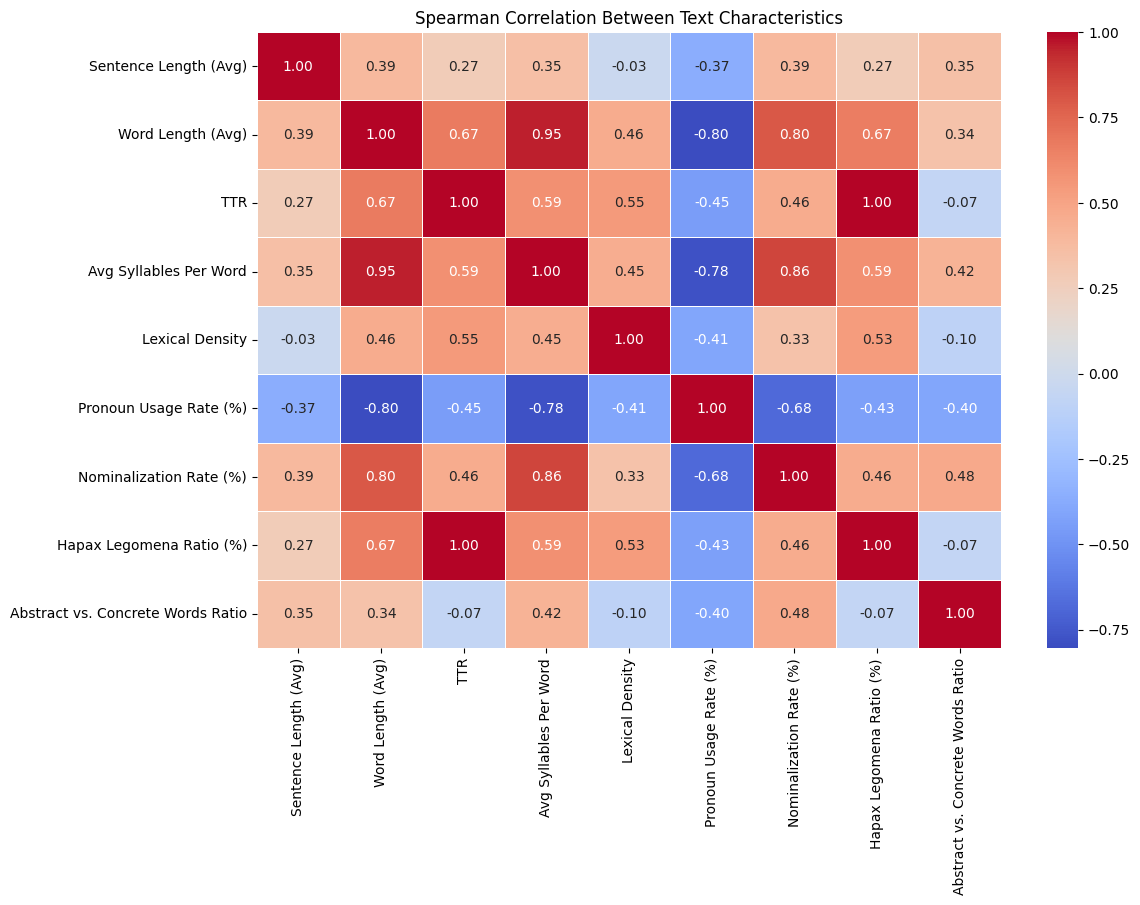

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

spearman_correlation_matrix = df_characteristics.corr(method="spearman")

plt.figure(figsize=(12, 8))

sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Spearman Correlation Between Text Characteristics")

plt.show()

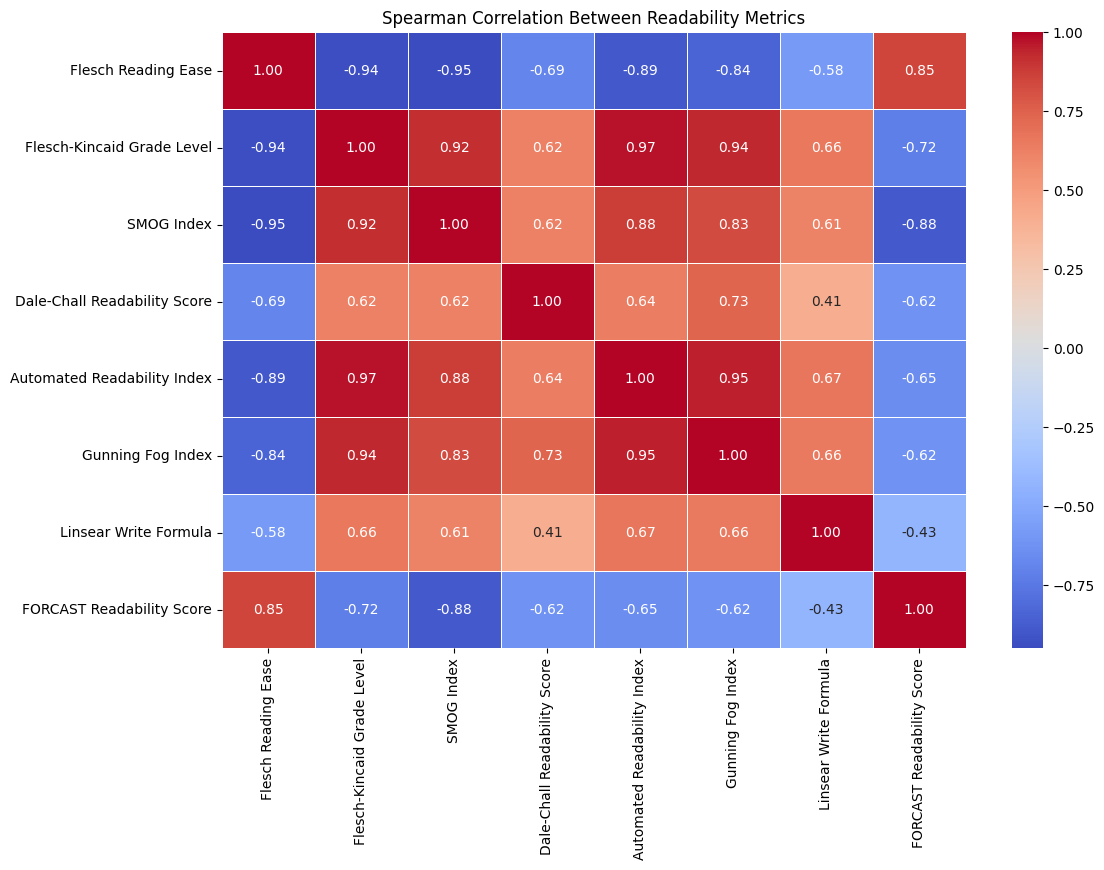

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

spearman_correlation_matrix = df_metrics.corr(method="spearman")

plt.figure(figsize=(12, 8))

sns.heatmap(spearman_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Spearman Correlation Between Readability Metrics")

plt.show()

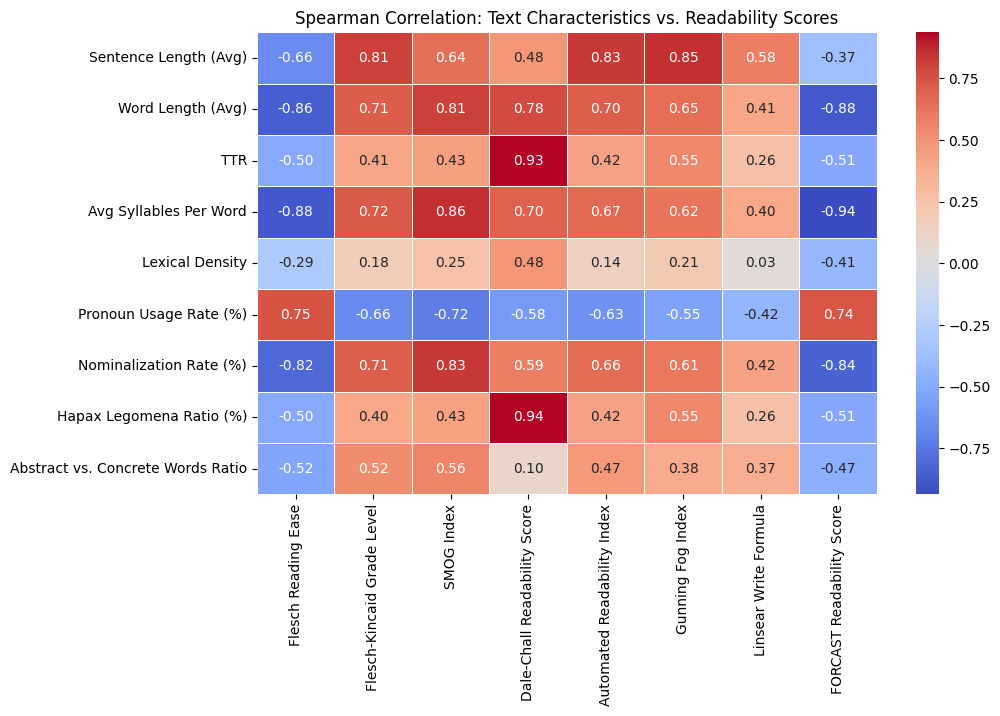

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

text_characteristics = [
    "Sentence Length (Avg)", "Word Length (Avg)", "TTR", "Avg Syllables Per Word",
    "Lexical Density", "Pronoun Usage Rate (%)", "Nominalization Rate (%)",
    "Hapax Legomena Ratio (%)", "Abstract vs. Concrete Words Ratio"
]

readability_metrics = [
    "Flesch Reading Ease", "Flesch-Kincaid Grade Level", "SMOG Index",
    "Dale-Chall Readability Score", "Automated Readability Index",
    "Gunning Fog Index", "Linsear Write Formula", "FORCAST Readability Score"
]

spearman_correlation_matrix = df_subset.corr(method="spearman")

filtered_correlation = spearman_correlation_matrix.loc[text_characteristics, readability_metrics]

plt.figure(figsize=(10, 6))

sns.heatmap(filtered_correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Spearman Correlation: Text Characteristics vs. Readability Scores")

plt.show()

<H1>THE FOLLOWING DECISIONS TREES WERE NOT USED IN THE FINAL VERSION OF THE THESIS!</H1>

<h1>Single Decision Tree for classification based on text characteristics</h1>

Text Characteristics Accuracy: 0.92

Classification Report:
                   precision    recall  f1-score   support

  Academic Books       0.88      1.00      0.93         7
Children's Books       0.81      1.00      0.90        13
   News Articles       1.00      1.00      1.00        20
          Poetry       1.00      0.60      0.75        10

        accuracy                           0.92        50
       macro avg       0.92      0.90      0.89        50
    weighted avg       0.93      0.92      0.91        50

Feature Importance:
 TTR                                  0.653219
Pronoun Usage Rate (%)               0.299561
Hapax Legomena Ratio (%)             0.030305
Word Length (Avg)                    0.016914
Sentence Length (Avg)                0.000000
Lexical Density                      0.000000
Nominalization Rate (%)              0.000000
Abstract vs. Concrete Words Ratio    0.000000
dtype: float64


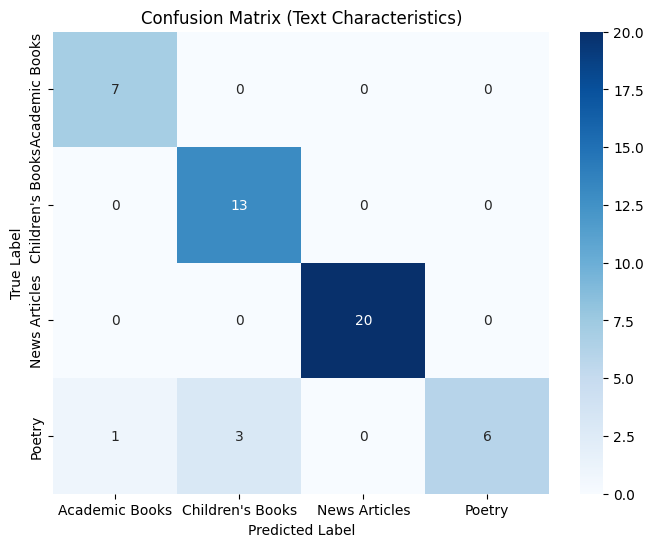

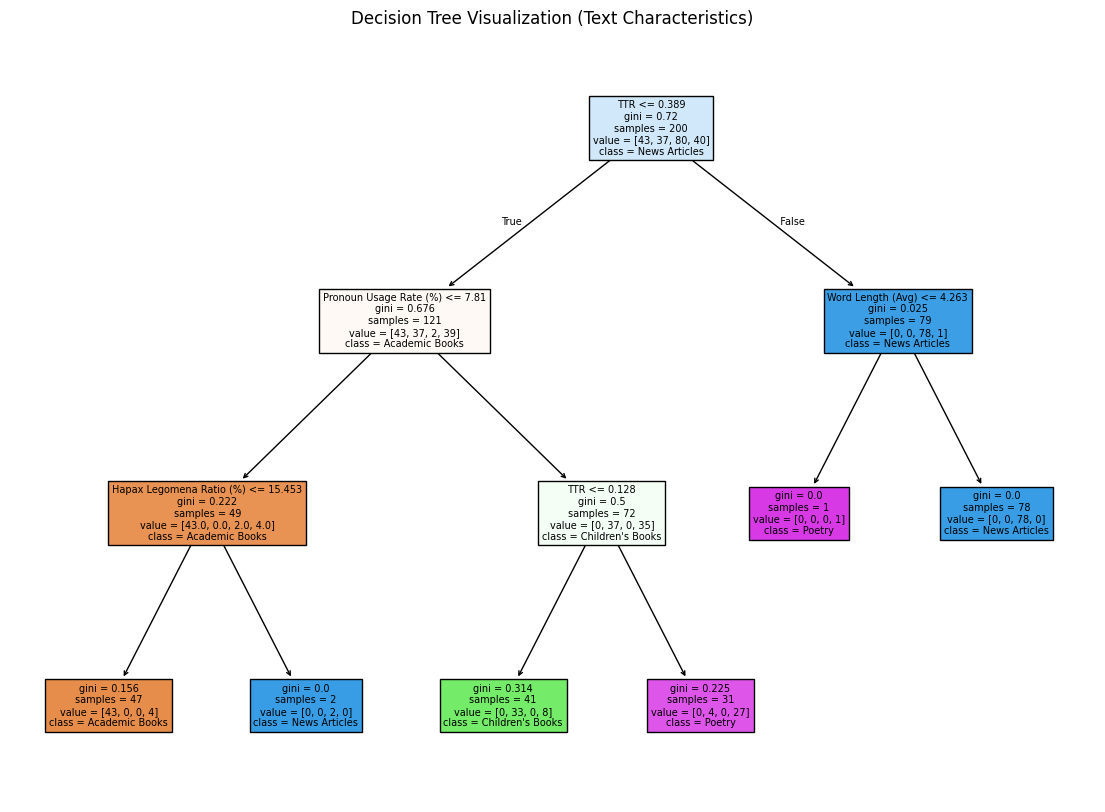

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

text_features = [
    'Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Lexical Density', 
    'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 
    'Abstract vs. Concrete Words Ratio'
]

X_text = df_results_expanded[text_features].astype(float)
y = df_results_expanded['Genre']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y_encoded, test_size=0.2, random_state=42)

clf_text = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_text.fit(X_train_text, y_train)

y_pred_text = clf_text.predict(X_test_text)
print("Text Characteristics Accuracy:", accuracy_score(y_test, y_pred_text))
print("\nClassification Report:\n", classification_report(y_test, y_pred_text, target_names=label_encoder.classes_))

feature_importance_text = pd.Series(clf_text.feature_importances_, index=text_features).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance_text)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_text), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Text Characteristics)")
plt.show()

plt.figure(figsize=(14, 10))
plot_tree(clf_text, feature_names=text_features, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization (Text Characteristics)")
plt.show()

In [ ]:
misclassified = X_test_text[y_test != y_pred_text]
misclassified['True Label'] = label_encoder.inverse_transform(y_test[y_test != y_pred_text])
misclassified['Predicted Label'] = label_encoder.inverse_transform(y_pred_text[y_test != y_pred_text])

print("Misclassified Samples:\n", misclassified)

Misclassified Samples:
      Sentence Length (Avg)  Word Length (Avg)       TTR  Lexical Density  \
104              35.256605           4.252326  0.086184         0.670396   
114              43.992278           4.463113  0.111274         0.695855   
140              18.786932           4.200616  0.037061         0.699758   
111              32.142633           4.277364  0.097552         0.694261   

     Pronoun Usage Rate (%)  Nominalization Rate (%)  \
104               11.962102                 1.466839   
114                9.057399                 1.735249   
140                8.435445                 1.380965   
111                9.939992                 1.336948   

     Hapax Legomena Ratio (%)  Abstract vs. Concrete Words Ratio True Label  \
104                  4.188630                           2.149776     Poetry   
114                  5.250884                           1.965885     Poetry   
140                  1.472616                           1.849492     Poetry  

C:\Users\adams\AppData\Local\Temp\ipykernel_36656\701985985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['True Label'] = label_encoder.inverse_transform(y_test[y_test != y_pred_text])
C:\Users\adams\AppData\Local\Temp\ipykernel_36656\701985985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['Predicted Label'] = label_encoder.inverse_transform(y_pred_text[y_test != y_pred_text])


: 

<h1>Random Forest for classification based on text characteristics</h1>

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8696153846153847
Accuracy: 0.94

Classification Report:
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         7
Children's Books       0.86      0.92      0.89        13
   News Articles       1.00      1.00      1.00        21
          Poetry       0.88      0.78      0.82         9

        accuracy                           0.94        50
       macro avg       0.93      0.93      0.93        50
    weighted avg       0.94      0.94      0.94        50

Feature Importance:
 TTR                                  0.445153
Avg Syllables Per Word               0.267554
Hapax Legomena Ratio (%)             0.157445
Sentence Length (Avg)                0.042648
Lexical Density                      0.032358
Pronoun Usage Rate (%)               0.027737
Abstract vs. Concrete Words Ratio    0.013632
Wo

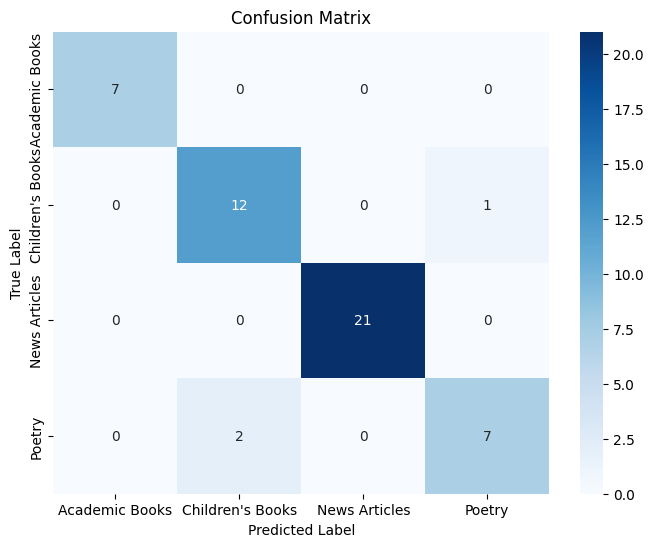

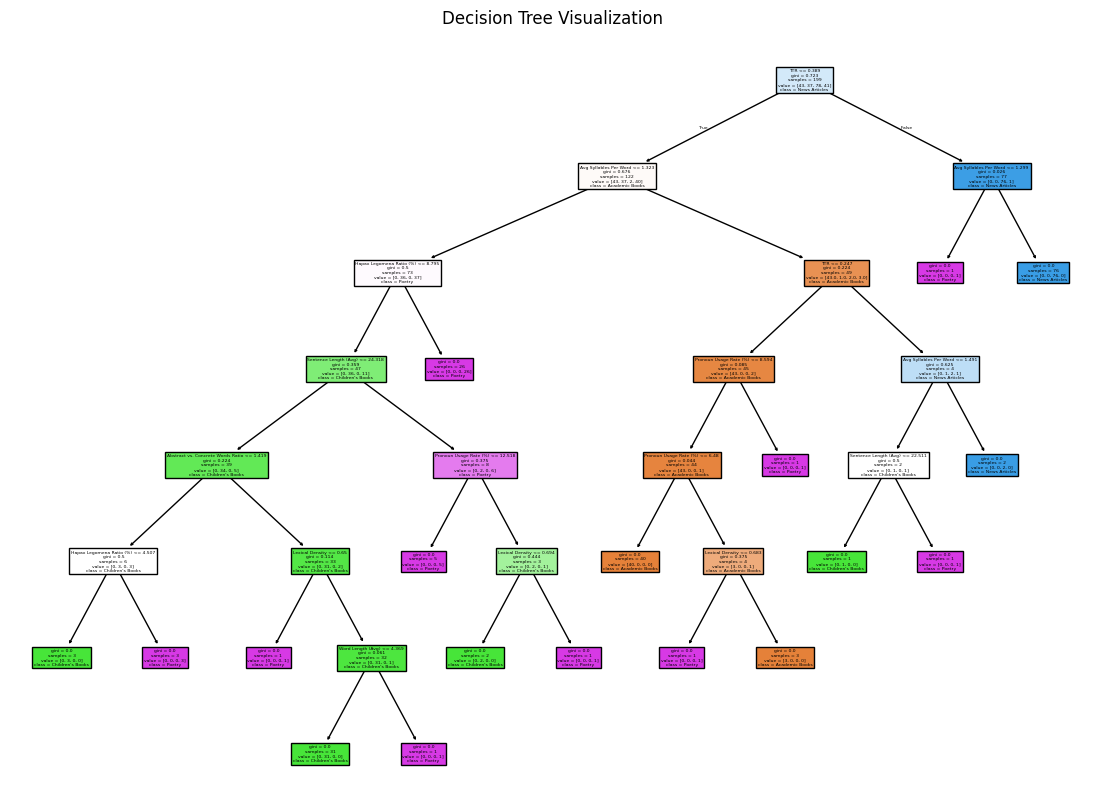

Cross-Validation Accuracy Scores: [0.9        0.92       0.92       0.74       0.89795918]
Mean CV Accuracy: 0.875591836734694
Random Forest Accuracy: 0.96

Random Forest Classification Report:
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         7
Children's Books       0.87      1.00      0.93        13
   News Articles       1.00      1.00      1.00        21
          Poetry       1.00      0.78      0.88         9

        accuracy                           0.96        50
       macro avg       0.97      0.94      0.95        50
    weighted avg       0.97      0.96      0.96        50

Random Forest Feature Importance:
 TTR                                  0.287702
Hapax Legomena Ratio (%)             0.238155
Avg Syllables Per Word               0.131527
Pronoun Usage Rate (%)               0.114775
Word Length (Avg)                    0.085271
Nominalization Rate (%)              0.060382
Abstract vs. Concrete Words

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "Dukes_results_expanded_edited.xlsx"
df = pd.read_excel(file_path)

df = df.dropna()

feature_columns = ['Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Avg Syllables Per Word', 'Lexical Density', 
                   'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 
                   'Abstract vs. Concrete Words Ratio']
target_column = "Genre"

X = df[feature_columns].astype(float)
y = df[target_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

feature_importance = pd.Series(best_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(14, 10))
plot_tree(best_clf, feature_names=feature_columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

cv_scores = cross_val_score(best_clf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

rf_feature_importance = pd.Series(rf_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_feature_importance)

<h1>Single decision tree for classification based on readability metrics</h1>

Readability Metrics Accuracy: 0.94

Classification Report:
                   precision    recall  f1-score   support

  Academic Books       0.88      1.00      0.93         7
Children's Books       1.00      0.92      0.96        13
   News Articles       1.00      0.95      0.97        20
          Poetry       0.82      0.90      0.86        10

        accuracy                           0.94        50
       macro avg       0.92      0.94      0.93        50
    weighted avg       0.95      0.94      0.94        50

Feature Importance:
 Dale-Chall Readability Score    0.654365
FORCAST Readability Score       0.300482
SMOG Index                      0.030501
Flesch Reading Ease             0.014652
Flesch-Kincaid Grade Level      0.000000
Automated Readability Index     0.000000
Gunning Fog Index               0.000000
Linsear Write Formula           0.000000
dtype: float64


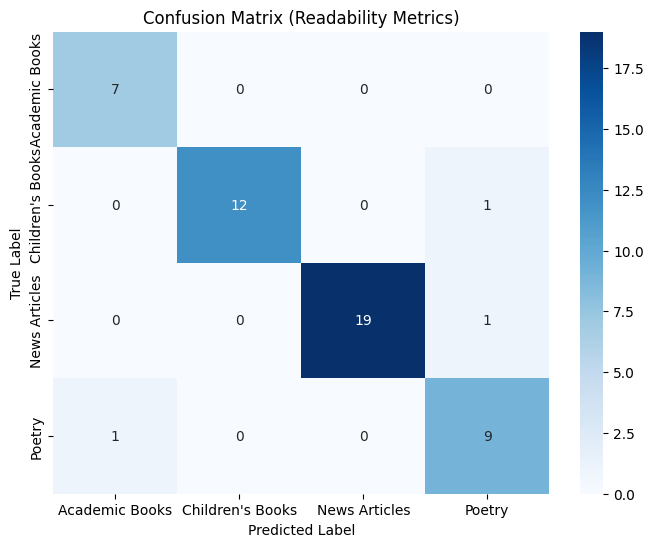

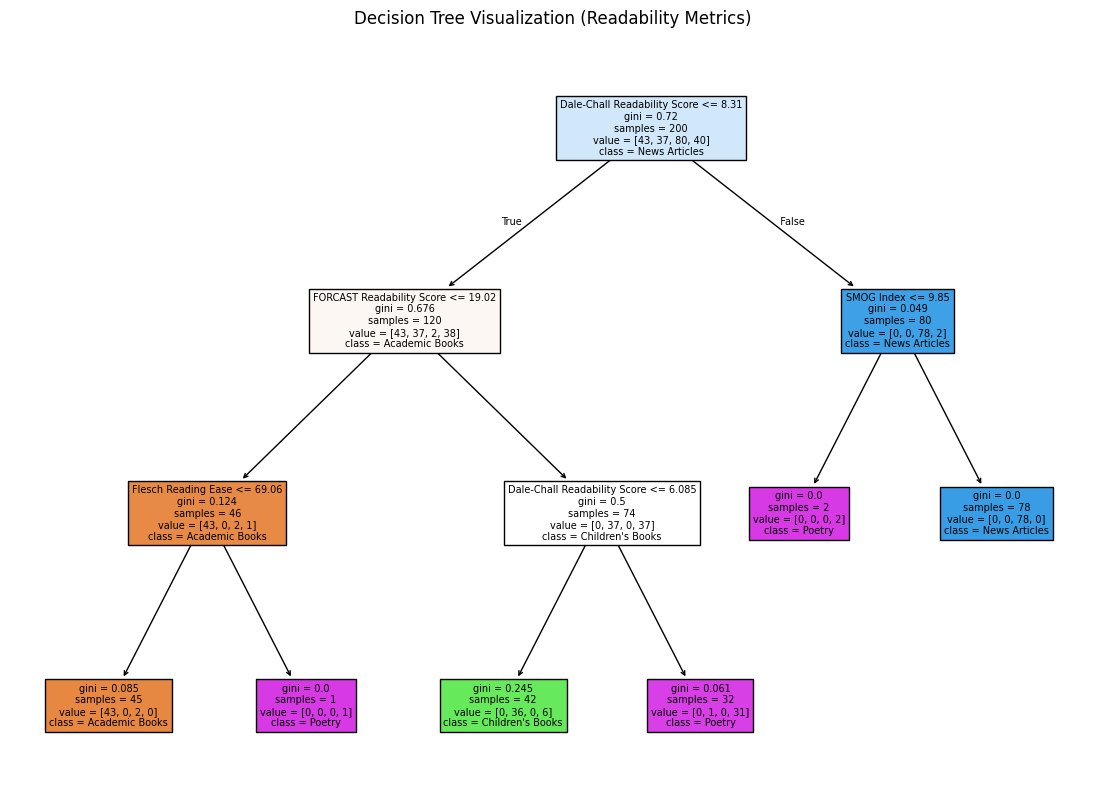

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

text_features = [
    'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 
    'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 
    'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score'
]

X_text = df_results_expanded[text_features].astype(float)
y = df_results_expanded['Genre']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y_encoded, test_size=0.2, random_state=42)

clf_text = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_text.fit(X_train_text, y_train)

y_pred_text = clf_text.predict(X_test_text)
print("Readability Metrics Accuracy:", accuracy_score(y_test, y_pred_text))
print("\nClassification Report:\n", classification_report(y_test, y_pred_text, target_names=label_encoder.classes_))

feature_importance_text = pd.Series(clf_text.feature_importances_, index=text_features).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance_text)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_text), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Readability Metrics)")
plt.show()

plt.figure(figsize=(14, 10))
plot_tree(clf_text, feature_names=text_features, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization (Readability Metrics)")
plt.show()

<h1>Random Forest Classification based on Readability Metrics</h1>

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.934871794871795
Accuracy: 0.94

Classification Report (Readability Metrics):
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         7
Children's Books       0.92      0.92      0.92        13
   News Articles       1.00      0.95      0.98        21
          Poetry       0.80      0.89      0.84         9

        accuracy                           0.94        50
       macro avg       0.93      0.94      0.94        50
    weighted avg       0.94      0.94      0.94        50

Feature Importance:
 Dale-Chall Readability Score    0.662436
FORCAST Readability Score       0.292890
SMOG Index                      0.030594
Flesch Reading Ease             0.014080
Flesch-Kincaid Grade Level      0.000000
Automated Readability Index     0.000000
Gunning Fog Index               0.000000
Linsear Write Fo

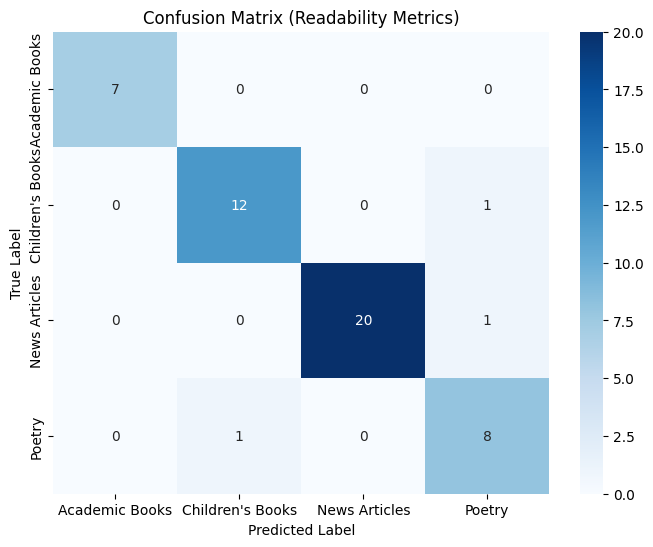

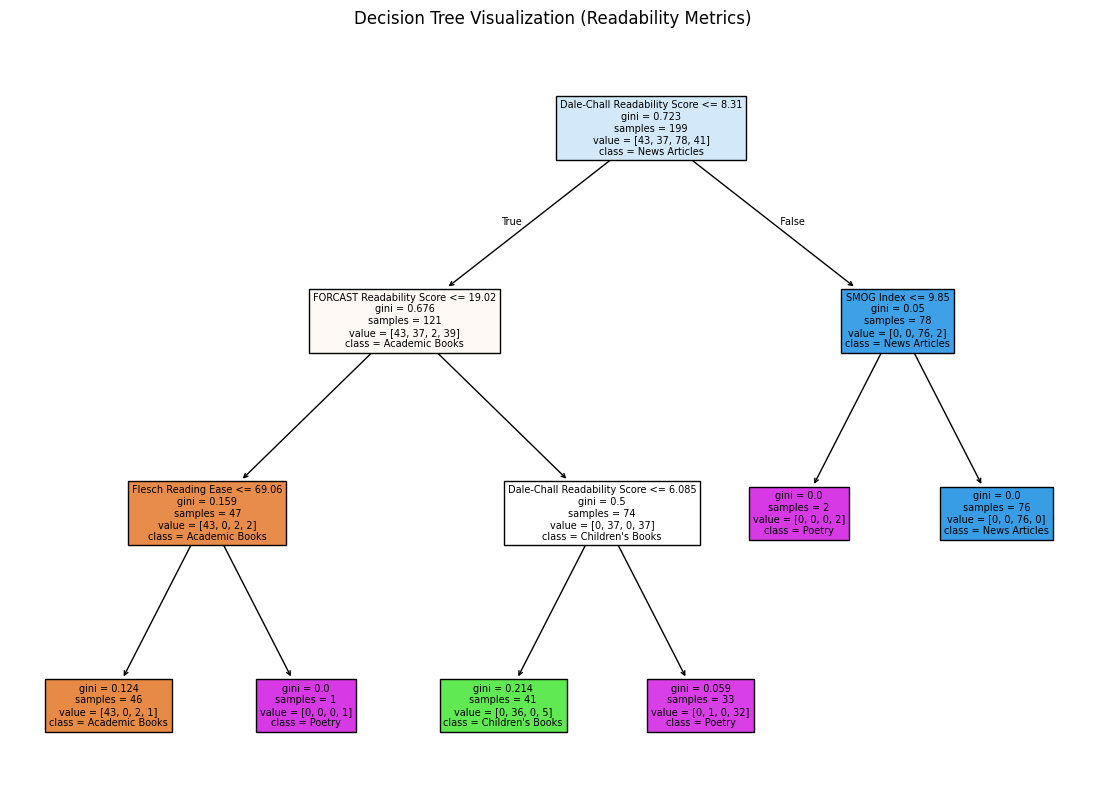

Cross-Validation Accuracy Scores: [0.92       0.92       0.94       0.9        0.89795918]
Mean CV Accuracy: 0.9155918367346938
Random Forest Accuracy: 0.92

Random Forest Classification Report:
                   precision    recall  f1-score   support

  Academic Books       0.88      1.00      0.93         7
Children's Books       0.92      0.92      0.92        13
   News Articles       1.00      0.95      0.98        21
          Poetry       0.78      0.78      0.78         9

        accuracy                           0.92        50
       macro avg       0.89      0.91      0.90        50
    weighted avg       0.92      0.92      0.92        50

Random Forest Feature Importance:
 Dale-Chall Readability Score    0.356260
SMOG Index                      0.150564
Flesch Reading Ease             0.118109
FORCAST Readability Score       0.116221
Gunning Fog Index               0.082793
Automated Readability Index     0.068351
Flesch-Kincaid Grade Level      0.060143
Linsear Write F

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "Dukes_results_expanded_edited.xlsx"
df = pd.read_excel(file_path)

df = df.dropna()

feature_columns = ['Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 
                   'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 
                   'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score']
target_column = "Genre"

X = df[feature_columns].astype(float)
y = df[target_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report (Readability Metrics):\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

feature_importance = pd.Series(best_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Readability Metrics)")
plt.show()

plt.figure(figsize=(14, 10))
plot_tree(best_clf, feature_names=feature_columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization (Readability Metrics)")
plt.show()

cv_scores = cross_val_score(best_clf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

rf_feature_importance = pd.Series(rf_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_feature_importance)

<h1>Decision Tree Classification Combining Text Characteristics and Readability Metrics</h1>

Readability Metrics Accuracy: 0.96

Classification Report:
                   precision    recall  f1-score   support

  Academic Books       0.88      1.00      0.93         7
Children's Books       1.00      0.92      0.96        13
   News Articles       1.00      1.00      1.00        20
          Poetry       0.90      0.90      0.90        10

        accuracy                           0.96        50
       macro avg       0.94      0.96      0.95        50
    weighted avg       0.96      0.96      0.96        50

Feature Importance:
 TTR                                  0.463528
FORCAST Readability Score            0.297638
Dale-Chall Readability Score         0.194775
Hapax Legomena Ratio (%)             0.028838
Avg Syllables Per Word               0.015221
Flesch-Kincaid Grade Level           0.000000
Linsear Write Formula                0.000000
Gunning Fog Index                    0.000000
Automated Readability Index          0.000000
SMOG Index                           0

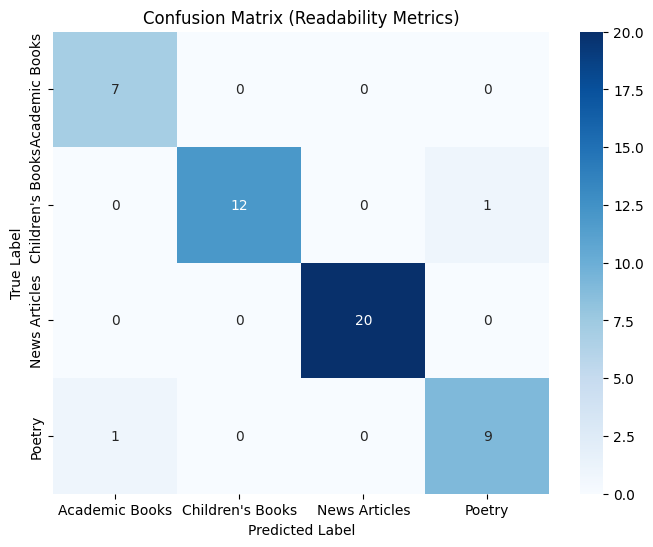

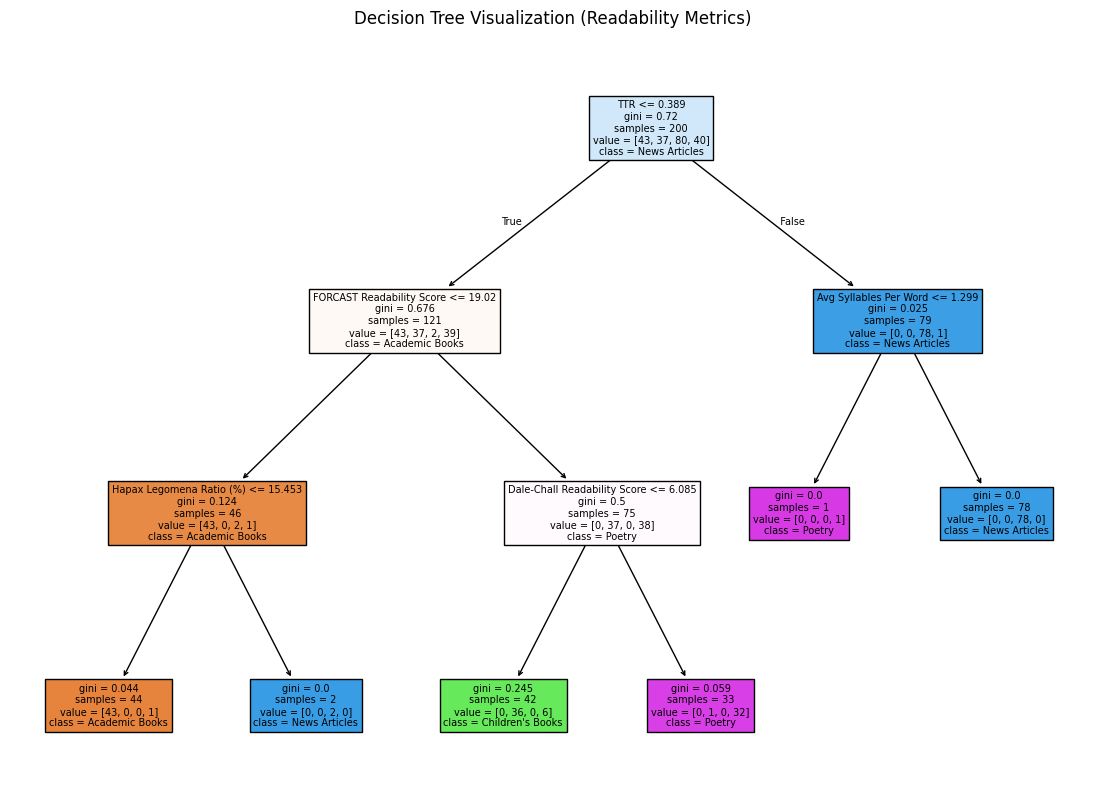

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "Dukes_results_expanded_edited.xlsx"
df_results_expanded = pd.read_excel(file_path)

text_features = [
    'Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Avg Syllables Per Word', 'Lexical Density', 
    'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 
    'Abstract vs. Concrete Words Ratio', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 
    'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 
    'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score'
]

X_text = df_results_expanded[text_features].astype(float)
y = df_results_expanded['Genre']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y_encoded, test_size=0.2, random_state=42)

clf_text = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_text.fit(X_train_text, y_train)

y_pred_text = clf_text.predict(X_test_text)
print("Readability Metrics Accuracy:", accuracy_score(y_test, y_pred_text))
print("\nClassification Report:\n", classification_report(y_test, y_pred_text, target_names=label_encoder.classes_))

feature_importance_text = pd.Series(clf_text.feature_importances_, index=text_features).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance_text)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_text), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Readability Metrics)")
plt.show()

plt.figure(figsize=(14, 10))
plot_tree(clf_text, feature_names=text_features, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization (Readability Metrics)")
plt.show()

<h1>Random Forest Classification based on Text Characteristics and Readability Metrics</h1>

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9298717948717948
Readability Metrics Accuracy: 0.96

Classification Report:
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         7
Children's Books       0.92      0.92      0.92        13
   News Articles       1.00      1.00      1.00        21
          Poetry       0.89      0.89      0.89         9

        accuracy                           0.96        50
       macro avg       0.95      0.95      0.95        50
    weighted avg       0.96      0.96      0.96        50

Feature Importance:
 TTR                                  0.457318
FORCAST Readability Score            0.288851
Dale-Chall Readability Score         0.206254
Hapax Legomena Ratio (%)             0.032369
Avg Syllables Per Word               0.015208
Flesch-Kincaid Grade Level           0.000000
Linsear Write Formula       

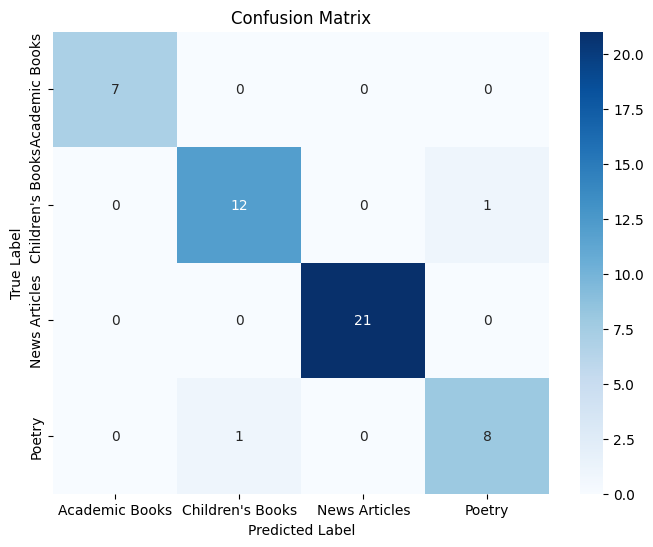

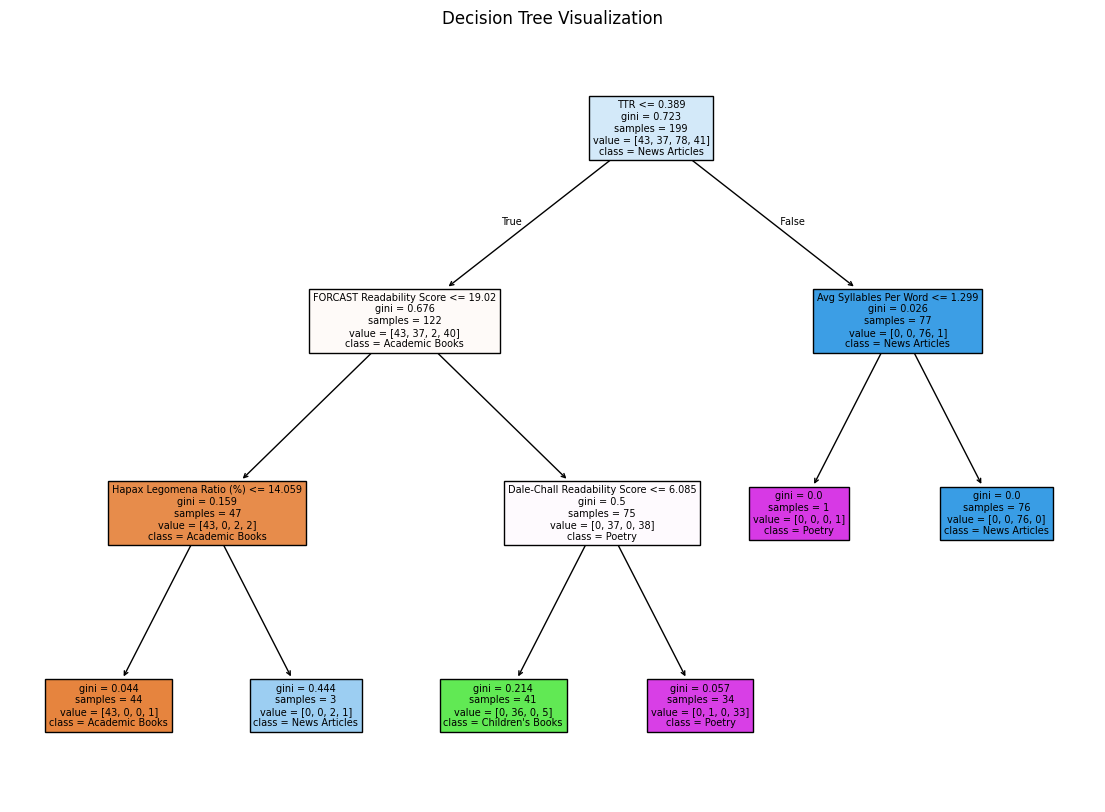

Cross-Validation Accuracy Scores: [0.98       0.96       0.98       0.92       0.89795918]
Mean CV Accuracy: 0.9475918367346938
Random Forest Accuracy: 0.96

Random Forest Classification Report:
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         7
Children's Books       0.92      0.92      0.92        13
   News Articles       1.00      1.00      1.00        21
          Poetry       0.89      0.89      0.89         9

        accuracy                           0.96        50
       macro avg       0.95      0.95      0.95        50
    weighted avg       0.96      0.96      0.96        50

Random Forest Feature Importance:
 Dale-Chall Readability Score         0.224680
TTR                                  0.198995
Hapax Legomena Ratio (%)             0.120201
Flesch Reading Ease                  0.070928
FORCAST Readability Score            0.068646
Avg Syllables Per Word               0.067546
SMOG Index                

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "Dukes_results_expanded_edited.xlsx"
df = pd.read_excel(file_path)

df = df.dropna()

feature_columns = ['Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Avg Syllables Per Word', 'Lexical Density', 
                   'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 
                   'Abstract vs. Concrete Words Ratio', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 
                   'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 
                   'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score']
target_column = "Genre" 

X = df[feature_columns].astype(float)
y = df[target_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Readability Metrics Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

feature_importance = pd.Series(best_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(14, 10))
plot_tree(best_clf, feature_names=feature_columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

cv_scores = cross_val_score(best_clf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

rf_feature_importance = pd.Series(rf_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_feature_importance)

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy for Random Forest: 0.9397435897435897
Random Forest Accuracy: 0.96

Random Forest Classification Report:
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         7
Children's Books       0.92      0.92      0.92        13
   News Articles       1.00      1.00      1.00        21
          Poetry       0.89      0.89      0.89         9

        accuracy                           0.96        50
       macro avg       0.95      0.95      0.95        50
    weighted avg       0.96      0.96      0.96        50

Random Forest Feature Importance:
 TTR                                  0.163047
Dale-Chall Readability Score         0.160544
Flesch Reading Ease                  0.136597
Hapax Legomena Ratio (%)             0.129299
FORCAST Readability Score        

C:\Users\adams\AppData\Local\Temp\ipykernel_20840\3735919219.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index, palette='viridis')


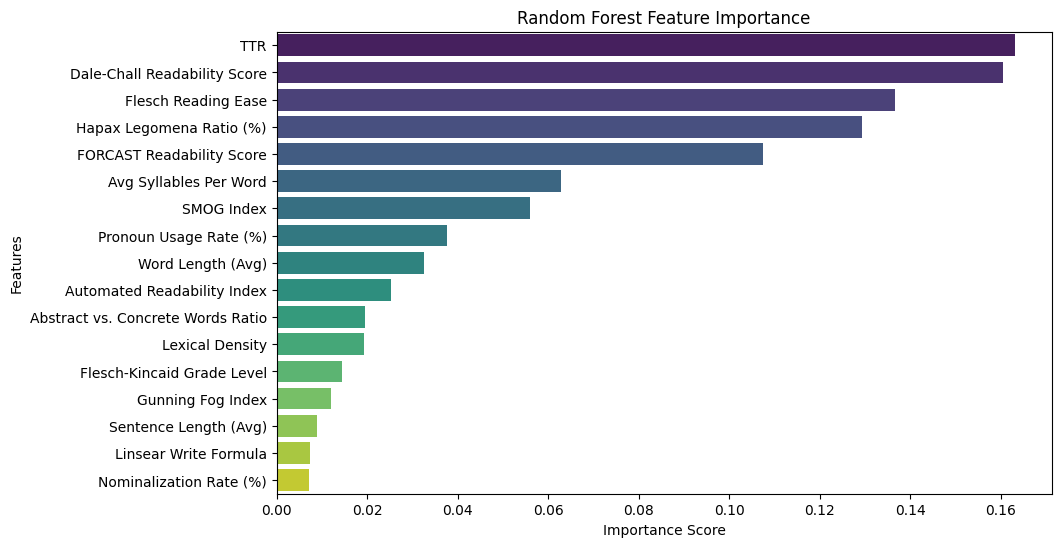

Random Forest ROC-AUC Score: 0.9955729650851602
Cross-Validation Accuracy Scores for Random Forest: [0.98       0.98       0.94       0.92       0.89795918]
Mean CV Accuracy for Random Forest: 0.9435918367346938


: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

file_path = "Dukes_results_expanded_edited.xlsx"
df = pd.read_excel(file_path)

df = df.dropna()

feature_columns = [
    'Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Avg Syllables Per Word', 'Lexical Density', 
    'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 
    'Abstract vs. Concrete Words Ratio', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 
    'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 
    'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score'
]
target_column = "Genre"

X = df[feature_columns].astype(float)
y = df[target_column]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", grid_search_rf.best_score_)

best_rf_clf = grid_search_rf.best_estimator_
best_rf_clf.fit(X_train, y_train)

y_pred_rf = best_rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

rf_feature_importance = pd.Series(best_rf_clf.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

y_pred_proba_rf = best_rf_clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')
print("Random Forest ROC-AUC Score:", roc_auc)

cv_scores_rf = cross_val_score(best_rf_clf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores for Random Forest:", cv_scores_rf)
print("Mean CV Accuracy for Random Forest:", cv_scores_rf.mean())

In [ ]:
import pandas as pd
file_path = "Dukes_results_expanded_edited.xlsx"
df = pd.read_excel(file_path)
print(df['Genre'].value_counts())

Genre
News Articles       100
Children's Books     50
Academic Books       50
Poetry               50
Name: count, dtype: int64


In [ ]:
feature_columns = [
    'Sentence Length (Avg)', 'Word Length (Avg)', 'TTR', 'Avg Syllables Per Word', 'Lexical Density', 
    'Pronoun Usage Rate (%)', 'Nominalization Rate (%)', 'Hapax Legomena Ratio (%)', 
    'Abstract vs. Concrete Words Ratio', 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level', 
    'SMOG Index', 'Dale-Chall Readability Score', 'Automated Readability Index', 
    'Gunning Fog Index', 'Linsear Write Formula', 'FORCAST Readability Score'
]
target_column = 'Genre'
from sklearn.utils import resample

print("Original Class Distribution:")
print(df[target_column].value_counts())

majority_class = df[target_column].value_counts().idxmax()
minority_classes = df[target_column].value_counts().index.drop(majority_class)

df_majority = df[df[target_column] == majority_class]
df_minority = df[df[target_column].isin(minority_classes)]

df_majority_undersampled = resample(df_majority, 
                                    replace=False,
                                    n_samples=len(df_minority) // len(minority_classes),
                                    random_state=42)

df_balanced = pd.concat([df_majority_undersampled, df_minority])

print("\nBalanced Class Distribution:")
print(df_balanced[target_column].value_counts())

Original Class Distribution:
Genre
News Articles       100
Children's Books     50
Academic Books       50
Poetry               50
Name: count, dtype: int64

Balanced Class Distribution:
Genre
News Articles       50
Children's Books    50
Academic Books      50
Poetry              50
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

label_encoder = LabelEncoder()

X_balanced = df_balanced[feature_columns].astype(float)
y_balanced = df_balanced[target_column]

y_balanced_encoded = label_encoder.fit_transform(y_balanced)

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced_encoded, test_size=0.2, random_state=42)

rf_clf_balanced = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf_balanced.fit(X_train_balanced, y_train_balanced)

y_pred_rf_balanced = rf_clf_balanced.predict(X_test_balanced)

print("Random Forest Accuracy (Balanced Dataset):", accuracy_score(y_test_balanced, y_pred_rf_balanced))
print("\nRandom Forest Classification Report (Balanced Dataset):\n", 
      classification_report(y_test_balanced, y_pred_rf_balanced, target_names=label_encoder.classes_))

rf_feature_importance_balanced = pd.Series(rf_clf_balanced.feature_importances_, index=feature_columns).sort_values(ascending=False)
print("Random Forest Feature Importance (Balanced Dataset):\n", rf_feature_importance_balanced)

Random Forest Accuracy (Balanced Dataset): 0.975

Random Forest Classification Report (Balanced Dataset):
                   precision    recall  f1-score   support

  Academic Books       1.00      1.00      1.00         9
Children's Books       1.00      0.93      0.97        15
   News Articles       1.00      1.00      1.00         6
          Poetry       0.91      1.00      0.95        10

        accuracy                           0.97        40
       macro avg       0.98      0.98      0.98        40
    weighted avg       0.98      0.97      0.98        40

Random Forest Feature Importance (Balanced Dataset):
 Dale-Chall Readability Score         0.202853
TTR                                  0.176372
FORCAST Readability Score            0.098141
Hapax Legomena Ratio (%)             0.093021
Avg Syllables Per Word               0.087866
SMOG Index                           0.059152
Flesch Reading Ease                  0.057084
Pronoun Usage Rate (%)               0.053999
Auto